# Pregunta 3 - Análisis de emociones en tweets


El análisis de emociones o sentimientos se refiere al proceso de extraer información acerca de la actitud que se manifiesta con respecto a un tópico o contexto de comunicación. El análisis de emociones ha sido extendido a varios medios en la actualidad, como lo son las redes sociales.
La conocida red social Twitter tiene una gran cantidad de usuarios, por lo que la información se genera a
cada segundo y el análisis de texto ha tomado bastante fuerza. La dificultad de este problema radica en el carácter altamente ambiguo e informal del lenguaje que utilizan naturalmente sus usuarios así como el manejo de negaciones, sarcasmo y abreviaciones en una frase.  

Para esta actividad se trabajará con un dataset de tweets ofrecidos por CrowdFlower. Cada tweet está
asociado a una emoción en particular, donde los conjunto de emociones se trabajarán excluyentemente, siendo un problema de múltiples clases.


#### a. Construir un dataframe con los datos, determinar clases y registros por clase.

In [3]:
import pandas as pd
df = pd.read_csv('text_emotion.csv')

In [4]:
print (df.shape)
print (df.columns)

(40000, 4)
Index(['tweet_id', 'sentiment', 'author', 'content'], dtype='object')


El dataset sobre el cual se trabaja está compuesto por 40000 registros. Cada uno de ellos descrito por 4 características que son 'tweet_id', 'sentiment', 'author' y 'content'.  
Los primeros registros del dataset se muestran a continuación:

In [5]:
df.head()

tweet_id   sentiment       author  \
0  1956967341       empty   xoshayzers   
1  1956967666     sadness    wannamama   
2  1956967696     sadness    coolfunky   
3  1956967789  enthusiasm  czareaquino   
4  1956968416     neutral    xkilljoyx   

                                             content  
0  @tiffanylue i know  i was listenin to bad habi...  
1  Layin n bed with a headache  ughhhh...waitin o...  
2                Funeral ceremony...gloomy friday...  
3               wants to hang out with friends SOON!  
4  @dannycastillo We want to trade with someone w...

Se observa que los registros describen 40000 tweets (content) emitidos por diferentes usuarios (author), cada uno asociado principalmene a una emoción (sentiment).  
Para esta sección se trabajará en base a los tweets almacenados (content) que se procesarán para realizar la futura clasificación de sentimientos de un post, es decir, la determinación de la emoción prioritaria asociada a un futuro tweet.

#### b. Construir un conjunto de entrenamiento y de pruebas, a través de una máscara aleatoria.

In [6]:
import numpy as np
msk = np.random.rand(len(df)) < 0.8
df_train = df[msk]
df_test = df[~msk]

In [7]:
len(df_train.content)

32166

In [8]:
len(df_test.content)

7834

 Se aplica un máscara aleatoria (msk), la cual se especifica de modo que separe los datos en proporciones aproximadas a 80%-20% (train-test). Es decir, se guarda el 80% inicial de los datos/dataframe para aplicarlos a una futura máquina en el proceso de entrenamiento y el 20% restante de los datos se proponen ser utilizados para verificar los resultados de los algoritmos.  
 


#### c. Implemente y explique un pre-procesamiento para los tweets para dejarlos en un formato estandarizado.

In [9]:
def remove_punctuation ( text ):
    return re.sub('[%s]' % re.escape(string.punctuation), ' ', text)

remove_punctuation, tal como su nombre lo indica, remueve todas las expresiones literales de signos de puntuación del texto (text) ingresado. Esta función es necesaria puesto que los puntos,comas,signos de interrogación,etc no son de utilidad o, no aportan información, cuando se busca analizar textos.

In [10]:
from nltk.corpus import stopwords
import re, string
def pre_procesar(lista_posts):
    transformar2=[]
    for i in lista_posts:
        a=' '.join(re.sub("(@[A-Za-z0-9]+)|(\w+:\/\/\S+)"," ",i).split())
        transformar2.append(a)
    transformar_low = [registro.lower() for registro in transformar2]
    transformar_tok = []
    for reg in transformar_low:
        transformar_tok.append(nltk.word_tokenize(remove_punctuation(reg)))

    stoplist = stopwords.words('english')
    transformar_stop=[]
    for reg in transformar_tok:
        clean = [token for token in reg if token not in stoplist ]
        transformar_stop.append(clean)
    transformar_clean1=[]
    for reg in transformar_tok:
        temp=[]
        for reg2 in reg:
            a= re.sub(r'\b[a-z]\b', ' ', reg2)
            if len(a)!=1:
                temp.append(a)
        transformar_clean1.append(temp)
    transformar_clean2=[]
    for reg in transformar_clean1:
        temp=[]
        for reg2 in reg:
            a=re.sub(r'\b[a-z][a-z]\b', ' ', reg2)
            if len(a)!=1:
                temp.append(a)
        transformar_clean2.append(temp)
    return transformar_clean2

pre_procesar lleva a cabo el proceso completo de limpieza del tweet a trabajar. 
Cómo?  
Recibe la lista de tweets del dataframe, se eliminan los posibles hashtags utilizados así como las páginas web/links que estén presentes en el post haciendo uso de expresiones regulares.  
Además de esto, se pasan todos los términos a minúsculas y se eliminan aquellos que corresponda a 'stopwords' es decir, aquellas palabras que no entreguen información por sí solas. Se eliminan también aquellas palabras de largo 1 y 2 que hayan permanecido en el tweet, es decir, palabras que todavía no hayan sido filtradas por la lista de los stopwords y que no representan un significado por sí mismas.  
Cabe destacar que este proceso es de gran importancia a la hora de proponerse analizar texto puesto que con esto se logra eliminar gran cantidad de términos no significativos y se obtiene un formato neutro que evita la duplicidad de palabras.  

A continuación se muestra la columna 'content' del dataframe de entrenamiento (df_train):

In [11]:
import scipy as sp
import matplotlib as plt
import nltk
transformar= df_train.content
print ("Los datos de entrenamiento están compuestos por", transformar.shape[0], "registros")
transformar.tolist()
print ("\nLos tweets orginales corresponden a: ")
print (transformar[:10])

Los datos de entrenamiento están compuestos por 32166 registros
0     @tiffanylue i know  i was listenin to bad habi...
1     Layin n bed with a headache  ughhhh...waitin o...
2                   Funeral ceremony...gloomy friday...
4     @dannycastillo We want to trade with someone w...
5     Re-pinging @ghostridah14: why didn't you go to...
6     I should be sleep, but im not! thinking about ...
7                  Hmmm. http://www.djhero.com/ is down
8               @charviray Charlene my love. I miss you
10                                     cant fall asleep
11                              Choked on her retainers
Name: content, dtype: object


Se crea una nueva función 'to_text' que toma una lista de palabras separadas por término (tokenizada) y retorna la lista de tweets sin separaciones. Es decir, como una frase completa.  
Esta función es requerida puesto que algunos métodos a utilizar requieren como entrada una lista de textos con estas características (no tokenizada)

In [12]:
def to_text(lista_prepro):
    cleaned=[]
    for reg in lista_prepro:
        final = ""
        for reg2 in reg: 
            final += reg2 + " "
        cleaned.append(final)
    #cleaned[:10]
    return cleaned

In [13]:
preprocesa2= pre_procesar(transformar)
tweets_cleaned=to_text(preprocesa2)
len(tweets_cleaned)

32166

Se observa que el texto preprocesado corresponde efectivamente a los 32166 registros (tweets) de entrenamiento iniciales.


#### d. Hacer una reducción binaria al problema para trabajarlo como un problema de clasificacion de dos clases. 

Para este punto se propone agrupar las distintas emociones existente en el dataset como positivas y negativas definiciendo un criterio a gusto tal que las clases se lograsen codificar como 1 y −1 respectivamente teniendo presente que el desbalanceo de los datos puede afectar al modelo. Es decir, se debe cuidar el no etiquetar mayoritariamente los datos como pertenecientes a una clase en particular.

#### Clasificación de emociones positivas y negativas (manual)

In [14]:
e_posit=[]
e_negat=[]
emociones=df_train.sentiment
print (emociones[:10])
print (emociones.shape)

0       empty
1     sadness
2     sadness
4     neutral
5       worry
6     sadness
7       worry
8     sadness
10    neutral
11      worry
Name: sentiment, dtype: object
(32166,)


Las emociones presentes en el dataset corresponden a 13 sentimientos. Cabe destacar que entre ellos, se encuentra la categoria 'empty' que, en estricto rigor, indica que no se logró detectar la emoción del tweet en cuestión.  
Las emociones presentes en los datos, con sus respectivas frecuencias de etiqueta, se especifican a continuación: 

In [15]:
freq_emoc= nltk.FreqDist(emociones)
freq_emoc

FreqDist({'anger': 96,
          'boredom': 145,
          'empty': 673,
          'enthusiasm': 610,
          'fun': 1428,
          'happiness': 4243,
          'hate': 1073,
          'love': 3116,
          'neutral': 6935,
          'relief': 1188,
          'sadness': 4154,
          'surprise': 1762,
          'worry': 6743})

Se observa que la emoción mayormente presente en el dataset corresponde a 'neutral' y 'worry', seguidas por 'happiness' y 'sadness'. Además es posible notar que, por sentido común, las etiquetas positivas sólo abarcan 'enthusiasm', 'fun', 'happiness', 'love' y 'relief', lo que corresponde a sólo 10000 aproximadamente.  
La distribución de estas emociones se puede apreciar en el siguiente gráfico:

In [16]:
x_plot= freq_emoc.keys()
y_plot= freq_emoc.values()

dict_keys(['empty', 'sadness', 'neutral', 'worry', 'love', 'fun', 'hate', 'happiness', 'enthusiasm', 'boredom', 'relief', 'surprise', 'anger'])
dict_values([673, 4154, 6935, 6743, 3116, 1428, 1073, 4243, 610, 145, 1188, 1762, 96])


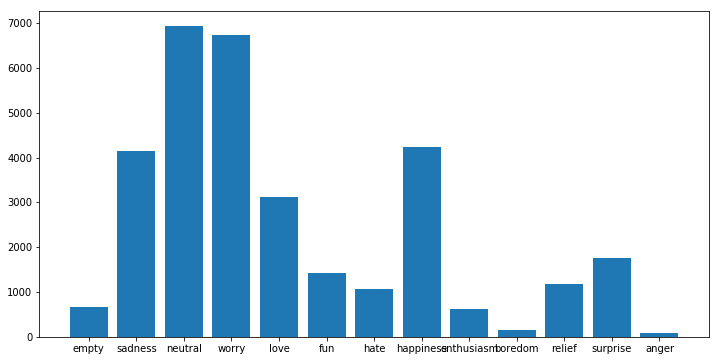

In [17]:
import matplotlib.pyplot as plt
xx=[]
yy=list(y_plot)
for i in range(len(x_plot)):
    xx.append(i)
fig = plt.figure(figsize=(12,6))
plt.bar(xx, yy, align='center')
LABELS=list(x_plot)
plt.xticks(xx, LABELS)
plt.show()

Para ayudar a la comprensión, se presentan igualmente 20 tweets del dataframe de entrenamiento (desde el 10 hasta el 30) 

In [18]:
df[10:30]

tweet_id sentiment           author  \
10  1956969456   neutral       feinyheiny   
11  1956969531     worry     dudeitsmanda   
12  1956970047   sadness         Danied32   
13  1956970424   sadness          Samm_xo   
14  1956970860  surprise     okiepeanut93   
15  1956971077   sadness           Sim_34   
16  1956971170      love     poppygallico   
17  1956971206   sadness  brokenangel1982   
18  1956971473     worry            LCJ82   
19  1956971586   sadness          cleepow   
20  1956971981     worry    andreagauster   
21  1956972097       fun    schiz0phren1c   
22  1956972116   neutral            jansc   
23  1956972270     worry        sweet8181   
24  1956972359   sadness   xamountoftruth   
25  1956972444     worry       jomama6881   
26  1956972557   sadness       LilithGaea   
27  1956972884     worry      oONEPTUNEOo   
28  1956973598   sadness  username_origin   
29  1956973690     worry    catchtheapple   

                                              content  
10                                   cant fall asleep  
11                            Choked on her retainers  
12  Ugh! I have to beat this stupid song to get to...  
13  @BrodyJenner if u watch the hills in london u ...  
14                                       Got the news  
15      The storm is here and the electricity is gone  
16                               @annarosekerr agreed  
17  So sleepy again and it's not even that late. I...  
18  @PerezHilton lady gaga tweeted about not being...  
19  How are YOU convinced that I have always wante...  
20  @raaaaaaek oh too bad! I hope it gets better. ...  
21  Wondering why I'm awake at 7am,writing a new s...  
22  No Topic Maps talks at the Balisage Markup Con...  
23  I ate Something I don't know what it is... Why...  
24  so tired and i think i'm definitely going to g...  
25  On my way home n having 2 deal w underage girl...  
26  @IsaacMascote  i'm sorry people are so rude to...  
27  Damm servers still down  i need to hit 80 befo...  
28  Fudge.... Just BS'd that whole paper.... So ti...  
29      I HATE CANCER. I HATE IT I HATE IT I HATE IT.

En vista del desbalanceo intuitivo de las emociones se considerarán como positivas igualmente todo aquel tweet cuya emoción ponderante sea 'neutral' pues no representa una emoción negativa y de este modo se lograrán balancear las etiquetas.

In [19]:
positive= ['enthusiasm', 'fun', 'happiness', 'love', 'relief', 'neutral']
negative= ['empty', 'sadness', 'worry', 'surprise', 'hate', 'boredom', 'anger']
total_posit=0
total_negat=0
for i in LABELS:    
    if i in positive:
        total_posit+=yy[LABELS.index(i)]
    else:
        total_negat+=yy[LABELS.index(i)]
print ("Número de registros con emociones positivas: ", total_posit)
print ("Número de registros con emociones negavivos: ", total_negat)

Número de registros con emociones positivas:  17520
Número de registros con emociones negavivos:  14646


Así entonces, se procede a construir el vector 'classifications' que contiene las etiquetas de cada tweet de la forma 1 o -1 para las emociones positivas y negativas respectivamente.

In [20]:
classifications=[]
for i in emociones:
    if i in positive:
        classifications.append(1)
    else:
        classifications.append(-1)

print (classifications[:20])

[-1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, 1, 1, -1, -1]


In [21]:
tweets_cleaned[:20]

['know was listenin bad habit earlier and started freakin his part ',
 'layin bed with headache ughhhh waitin your call ',
 'funeral ceremony gloomy friday ',
 'want trade with someone who has houston tickets but one will ',
 'pinging why didn you prom didn like friends ',
 'should sleep but not thinking about old friend who want but married now damn amp wants scandalous ',
 'hmmm down ',
 'charlene love miss you ',
 'cant fall asleep ',
 'choked her retainers ',
 'watch the hills london will realise what tourture because were weeks and weeks late just watch itonlinelol ',
 'the storm here and the electricity gone ',
 'agreed ',
 'sleepy again and not even that late fail once again ',
 'how are you convinced that have always wanted you what signals did give off damn think just lost another friend ',
 'too bad hope gets better been having sleep issues lately too ',
 'wondering why awake 7am writing new song plotting evil secret plots muahahaha damn not secret anymore ',
 'topic maps tal

### Método alternativo: Clasificación de emociones positivas y negativas automática

In [22]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

/etc/Anaconda3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [23]:
print (sid.polarity_scores('you re ugly'))
print (sid.polarity_scores('you'))
print (sid.polarity_scores('re'))
print (sid.polarity_scores('ugly'))

{'neg': 0.623, 'neu': 0.377, 'pos': 0.0, 'compound': -0.5106}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5106}


In [24]:
positivos=0
negativos=0
for i in tweets_cleaned:
    sentencia_preprocesada = i
    result=sid.polarity_scores(sentencia_preprocesada)
    print (sentencia_preprocesada, "\n", result)
    print ("")
    if result['neg']<result['pos']:
        positivos+=1
    else:
        negativos+=1

print (positivos)
print (negativos)

know was listenin bad habit earlier and started freakin his part  
 {'neg': 0.259, 'neu': 0.741, 'pos': 0.0, 'compound': -0.5423}

layin bed with headache ughhhh waitin your call  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

funeral ceremony gloomy friday  
 {'neg': 0.672, 'neu': 0.328, 'pos': 0.0, 'compound': -0.4767}

want trade with someone who has houston tickets but one will  
 {'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'compound': 0.0387}

pinging why didn you prom didn like friends  
 {'neg': 0.0, 'neu': 0.517, 'pos': 0.483, 'compound': 0.6808}

should sleep but not thinking about old friend who want but married now damn amp wants scandalous  
 {'neg': 0.303, 'neu': 0.483, 'pos': 0.214, 'compound': -0.5267}

hmmm down  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

charlene love miss you  
 {'neg': 0.205, 'neu': 0.256, 'pos': 0.538, 'compound': 0.5574}

cant fall asleep  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

choked her retainers  
 {'neg': 

that awesome have that this weekend too but can because moving this sat should lot fun though  
 {'neg': 0.0, 'neu': 0.682, 'pos': 0.318, 'compound': 0.7906}

night night twitter world still cant believe the thomas thing tomorrow gunna fun sad  
 {'neg': 0.168, 'neu': 0.652, 'pos': 0.179, 'compound': 0.0516}

oats this happening too  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

tah hugs  
 {'neg': 0.0, 'neu': 0.238, 'pos': 0.762, 'compound': 0.4939}

bored now because was talking someone but now they busy with something else just kinda bummer idk  
 {'neg': 0.289, 'neu': 0.711, 'pos': 0.0, 'compound': -0.5709}

knoww things won the samee  
 {'neg': 0.0, 'neu': 0.519, 'pos': 0.481, 'compound': 0.5719}

omg ness 11 18 and need beup early set garage sale starts 8am wish said 9am beat  
 {'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 'compound': 0.4019}

kno doooo yall partyin with out  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

okay twitter suddenly changed how respond

how wish you would get her sign something then send let call you when you meet something  
 {'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 'compound': 0.4019}

hmmm thought were sleeping too bad can see those videos until tomorrow night  
 {'neg': 0.226, 'neu': 0.774, 'pos': 0.0, 'compound': -0.5423}

morning everyone sorry for going early last night had bad news felt totally crap today new day  
 {'neg': 0.355, 'neu': 0.645, 'pos': 0.0, 'compound': -0.7713}

went the beach and started raining  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

how wish parents put into chinese school when was younger then much easier for get job  
 {'neg': 0.0, 'neu': 0.718, 'pos': 0.282, 'compound': 0.6705}

yeah physically moving too apparently reporting directly hayward  
 {'neg': 0.0, 'neu': 0.761, 'pos': 0.239, 'compound': 0.296}

airport and you didnt show tonight homo  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

jealous looks like schindler list toronto  
 {'neg': 0.316, 'neu': 0.4


aaaaaahhhhhhhh soooooooo sweeeeeeet miss that age soooo much  
 {'neg': 0.186, 'neu': 0.814, 'pos': 0.0, 'compound': -0.1531}

just saw fox was getting the freeway hope goes home  
 {'neg': 0.0, 'neu': 0.661, 'pos': 0.339, 'compound': 0.4767}

scratch that sleep stage bound  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

recapping britains got talent britain seems more talented than america  
 {'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.7501}

cnt get its goin old messages help  
 {'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compound': 0.4019}

good time rocking out open mic thanks all the love support now working business plan presentation again 2nite  
 {'neg': 0.0, 'neu': 0.524, 'pos': 0.476, 'compound': 0.9136}

miss friend  
 {'neg': 0.333, 'neu': 0.0, 'pos': 0.667, 'compound': 0.3818}

ohh haha iyaa summer filled with one course that lasts for the whole summer  
 {'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'compound': 0.4588}

lettuce amp spinach does best cool weat


jenny fell asleep and didn come over  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

why love those that can not have  
 {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.6369}

wishes you had teased with movie night  
 {'neg': 0.25, 'neu': 0.568, 'pos': 0.182, 'compound': -0.1531}

lost followers over night nobody likes  
 {'neg': 0.253, 'neu': 0.44, 'pos': 0.308, 'compound': 0.128}

missed one this year the forbidden fruit all the trees the garden munch disappointment that one  
 {'neg': 0.39, 'neu': 0.61, 'pos': 0.0, 'compound': -0.8074}

want new phone seen too much cellphone commercials  
 {'neg': 0.0, 'neu': 0.843, 'pos': 0.157, 'compound': 0.0772}

soo sad just the edges the pages but not gon come out cries  
 {'neg': 0.337, 'neu': 0.663, 'pos': 0.0, 'compound': -0.6808}

this time really need shut going sleep head aches badly and really can take  
 {'neg': 0.298, 'neu': 0.702, 'pos': 0.0, 'compound': -0.6249}

becuz you braggin  
 {'neg': 0.0, 'neu': 1.0, 'pos':

where the songs the site want quot you quot this computer too  
 {'neg': 0.0, 'neu': 0.894, 'pos': 0.106, 'compound': 0.0772}

has had the flu pass unto andy went shopping and got fresh chicken for chicken soup but amp this sat sad panda  
 {'neg': 0.224, 'neu': 0.714, 'pos': 0.062, 'compound': -0.6486}

has exam 10am slept about hours last night  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

not well  
 {'neg': 0.645, 'neu': 0.355, 'pos': 0.0, 'compound': -0.2057}

rain what the hell way tell  
 {'neg': 0.479, 'neu': 0.521, 'pos': 0.0, 'compound': -0.6808}

wish lived atleast relatively close ohio haven seen troy mcloven almost year  
 {'neg': 0.0, 'neu': 0.803, 'pos': 0.197, 'compound': 0.4019}

crap  
 {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.3818}

carlie came over and she fell asleep  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

and within short time the last clue all them  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

phone still doesn

watching blood veoh episode 19 love the music wishing could watch the live action but not old enough  
 {'neg': 0.0, 'neu': 0.798, 'pos': 0.202, 'compound': 0.4678}

unny today not taking too long decide haha wna get tan  
 {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.4588}

miss that too  
 {'neg': 0.444, 'neu': 0.556, 'pos': 0.0, 'compound': -0.1531}

tummy hurts  
 {'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}

should get life sam just texted phuture tonight  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

just watched the goode family premiere online and think this may the last episode watch pretty amazingly mediocre pass  
 {'neg': 0.0, 'neu': 0.849, 'pos': 0.151, 'compound': 0.4939}

cant watch anythgin till tonight  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

sad that will have leave beautiful apartment  
 {'neg': 0.352, 'neu': 0.328, 'pos': 0.32, 'compound': 0.1531}

gon dream about prince charming tonight see everything goes back

feel like ive done the london marathon ach all over  
 {'neg': 0.0, 'neu': 0.783, 'pos': 0.217, 'compound': 0.3612}

going die from study overload this weekend too much homework with paying work interrupt screwed  
 {'neg': 0.522, 'neu': 0.478, 'pos': 0.0, 'compound': -0.9001}

not excited blowing out another candle today when was kid  
 {'neg': 0.184, 'neu': 0.816, 'pos': 0.0, 'compound': -0.2584}

yeps just for today though badly wanted some geek shopping  
 {'neg': 0.38, 'neu': 0.62, 'pos': 0.0, 'compound': -0.5994}

was just watching some cartoons haven years when was eating breakfast the programs have changed  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

tried dye hair and all got was blond chunk the front middle part hair dang  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

sooooo tired wants crawl back into bed  
 {'neg': 0.326, 'neu': 0.674, 'pos': 0.0, 'compound': -0.4404}

the fam back the big island said the vog has been bad that they can see the ocean 

looks like ion based mini itx board won ship until mid june now the earliest  
 {'neg': 0.0, 'neu': 0.677, 'pos': 0.323, 'compound': 0.7351}

hoping that this will just heal own because anything put just makes worse owww  
 {'neg': 0.173, 'neu': 0.67, 'pos': 0.156, 'compound': -0.0772}

awww dnt say that wanted see how bad  
 {'neg': 0.333, 'neu': 0.667, 'pos': 0.0, 'compound': -0.5423}

dude everyone could wasn ment bad  
 {'neg': 0.412, 'neu': 0.588, 'pos': 0.0, 'compound': -0.5423}

what don sad glad your 21  
 {'neg': 0.307, 'neu': 0.396, 'pos': 0.297, 'compound': -0.0258}

with you been till for the last few nights  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

apparently excessive heat just bad for cold excessive cold body all blerg sofa not comfy enough for gaming  
 {'neg': 0.171, 'neu': 0.829, 'pos': 0.0, 'compound': -0.5423}

depechemode concert next week cancelled alternative date not known yet dave gahan had tumor  
 {'neg': 0.277, 'neu': 0.723, 'pos': 0.0, 'comp

 {'neg': 0.0, 'neu': 0.642, 'pos': 0.358, 'compound': 0.6908}

really don want the eisteddfod concert tonight would didnt have wear the dumb band uniform  
 {'neg': 0.185, 'neu': 0.727, 'pos': 0.088, 'compound': -0.4062}

morning panic clicked link and opened browser firefox what have you done with all saved tabs gone that learn  
 {'neg': 0.143, 'neu': 0.736, 'pos': 0.121, 'compound': -0.128}

just going into school get some spanish cds quot sigueee quot haha then guess what plans are studying all day again  
 {'neg': 0.0, 'neu': 0.87, 'pos': 0.13, 'compound': 0.4588}

its too early  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

when the weather ugh something like asthma yeah ventolin  
 {'neg': 0.207, 'neu': 0.444, 'pos': 0.348, 'compound': 0.2263}

now have new videos ipod delted few could replace them  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

wowza only the second tweet entire trip and leave days but first blow tomorrow night  
 {'neg': 0.073, 'neu': 0.92

hey you whore that kinda mean dont think  
 {'neg': 0.381, 'neu': 0.619, 'pos': 0.0, 'compound': -0.6486}

really want old friend party tonight but have fakeflu that and alcohol probably won mix well  
 {'neg': 0.0, 'neu': 0.457, 'pos': 0.543, 'compound': 0.9017}

wow christian lacroix bankrupt sad  
 {'neg': 0.536, 'neu': 0.16, 'pos': 0.304, 'compound': -0.4404}

brownie sundaes five and dumpster blood bros itunes palm reader was closed fun the 371 anyway  
 {'neg': 0.085, 'neu': 0.741, 'pos': 0.175, 'compound': 0.4019}

got messgae but didnt work cause have text saver not like money credit sad now wat xoxo  
 {'neg': 0.341, 'neu': 0.463, 'pos': 0.196, 'compound': -0.4751}

have much learn  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

missin bro  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

tired being tired  
 {'neg': 0.853, 'neu': 0.147, 'pos': 0.0, 'compound': -0.7003}

kidney stone really ugh  
 {'neg': 0.508, 'neu': 0.492, 'pos': 0.0, 'compound': -0.4754}



enzo blech thats fail when you receiving dollars quoted job usd last month getting paid now major losses  
 {'neg': 0.279, 'neu': 0.721, 'pos': 0.0, 'compound': -0.7351}

tmz harvey levin type tmz find people  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

wish nicky were home too  
 {'neg': 0.0, 'neu': 0.597, 'pos': 0.403, 'compound': 0.4019}

again your fault didnt make leave  
 {'neg': 0.344, 'neu': 0.51, 'pos': 0.146, 'compound': -0.372}

umm why will not let change background twitter challenged  
 {'neg': 0.149, 'neu': 0.851, 'pos': 0.0, 'compound': -0.1027}

really want marry leighton meester damn can take eyes her  
 {'neg': 0.22, 'neu': 0.651, 'pos': 0.13, 'compound': -0.2748}

just say reeesee cup  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

ill bed stomach killing  
 {'neg': 0.783, 'neu': 0.217, 'pos': 0.0, 'compound': -0.802}

hmm osaka last show today very sad can decode msg haha cant wait till get sydney missed out tickets tho  
 {'neg': 0.219, 'neu


the only that didnt tigerheat tonite  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

come hang out wif meeee  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

yes otherdad wait back sleep cause mischief  
 {'neg': 0.245, 'neu': 0.49, 'pos': 0.265, 'compound': 0.0516}

hmmm thinking about taking back that feel better this morning think spoke early  
 {'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'compound': 0.4404}

not too macabre but its hard believe dropped real nuclear weapon real japanese humans warisfucked  
 {'neg': 0.253, 'neu': 0.747, 'pos': 0.0, 'compound': -0.5267}

inshalla devo wont the astor tonight  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

wish wasn all bummed but kinda  
 {'neg': 0.0, 'neu': 0.73, 'pos': 0.27, 'compound': 0.2144}

yup unfortunately took today off work and just slept all day  
 {'neg': 0.194, 'neu': 0.806, 'pos': 0.0, 'compound': -0.34}

itunes upgrade reset playcount zero how will know which one 143 hasta siempre versions li


working the news well while doing all this amp rob all over the place wonder that boy never gets left alone  
 {'neg': 0.142, 'neu': 0.708, 'pos': 0.151, 'compound': -0.1926}

blimey you still suffering  
 {'neg': 0.508, 'neu': 0.492, 'pos': 0.0, 'compound': -0.4767}

yeah that was thumb last night sorry  
 {'neg': 0.153, 'neu': 0.588, 'pos': 0.259, 'compound': 0.2263}

back from las vagas nice trip nice food but lose 100 with slot machine  
 {'neg': 0.193, 'neu': 0.599, 'pos': 0.207, 'compound': -0.1901}

ill alright but the whip may not  
 {'neg': 0.226, 'neu': 0.595, 'pos': 0.179, 'compound': -0.1027}

fack gave police thats some seriouse shit  
 {'neg': 0.375, 'neu': 0.625, 'pos': 0.0, 'compound': -0.5574}

cant afford school here  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

too broke for cigarettes  
 {'neg': 0.483, 'neu': 0.517, 'pos': 0.0, 'compound': -0.4215}

joy feel like red lea now  
 {'neg': 0.0, 'neu': 0.388, 'pos': 0.612, 'compound': 0.743}

squirrel where 


way work  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

sick the doctors waiting room  
 {'neg': 0.452, 'neu': 0.548, 'pos': 0.0, 'compound': -0.5106}

this place blows ubertwitter isn functioning here had switch  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

too much details but glad better  
 {'neg': 0.0, 'neu': 0.338, 'pos': 0.662, 'compound': 0.8338}

just finished the village love could watch over and over wonder why can get sleep tonight  
 {'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'compound': 0.6369}

sooo lost without car this truly depressing pregnant people should never this stressed out  
 {'neg': 0.389, 'neu': 0.457, 'pos': 0.154, 'compound': -0.631}

what wrong with people second break wallmans tonight  
 {'neg': 0.307, 'neu': 0.693, 'pos': 0.0, 'compound': -0.4767}

like the most saddest person jtv right now because you are not  
 {'neg': 0.256, 'neu': 0.595, 'pos': 0.149, 'compound': -0.4201}

heathrow connect ï¿½7 40 thought was bargain express 15 


are looking forward daddy returning from work saturday been gone whole month  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

finishing homework booo  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

and the quot fuck quot was because dont get gift was exited about and was sooo awesome  
 {'neg': 0.246, 'neu': 0.583, 'pos': 0.171, 'compound': -0.2037}

freaking bored the bus hate being poor ï¿½4 80 return for 10 min train ï¿½2 return for hour long bus ipod has battery  
 {'neg': 0.381, 'neu': 0.619, 'pos': 0.0, 'compound': -0.8934}

have choice have get  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

football session after this fun  
 {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.596}

heading off poole around 4ish has some serious gardening before tweetdeck til sunday evening  
 {'neg': 0.091, 'neu': 0.909, 'pos': 0.0, 'compound': -0.0772}

its not fruit its those sugar covered sweets tummy not happy  
 {'neg': 0.197, 'neu': 0.592, 'pos': 0.211, 'c


but will just seems such cruel condition  
 {'neg': 0.464, 'neu': 0.536, 'pos': 0.0, 'compound': -0.7351}

last night had bottle wine house and cocktails came home sober but still gon sick  
 {'neg': 0.241, 'neu': 0.759, 'pos': 0.0, 'compound': -0.6652}

remember when vanessa first stepped the scene she would give the paps now shes famous guess use abuse  
 {'neg': 0.198, 'neu': 0.802, 'pos': 0.0, 'compound': -0.6369}

cupcakes gave heartburn  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

stayin over dustins tonight car hates  
 {'neg': 0.367, 'neu': 0.633, 'pos': 0.0, 'compound': -0.4404}

twtvite aptw have miss this now because other engagements  
 {'neg': 0.157, 'neu': 0.686, 'pos': 0.157, 'compound': 0.0}

finally reunited with hunny bunny 0802 have him for few days b4 leaves again for another week away work night  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

thts kinda young boo  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

has horrible toothach


forwarded email about cool science event canberra and friend thought was sydney and trekked out the wrong place  
 {'neg': 0.131, 'neu': 0.636, 'pos': 0.233, 'compound': 0.34}

keep getting pet days but heard the weekend fab wedding how soon again  
 {'neg': 0.0, 'neu': 0.75, 'pos': 0.25, 'compound': 0.6124}

can believe peeling from one and half days sunshine  
 {'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'compound': 0.4939}

don know what this all about but goin sleep  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

but better hurry you wouldn labeled copycats  
 {'neg': 0.0, 'neu': 0.609, 'pos': 0.391, 'compound': 0.5927}

last friday today  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

will flying ontario hours will probably stay awake will there for days camping the first time yay sleepy now  
 {'neg': 0.0, 'neu': 0.841, 'pos': 0.159, 'compound': 0.5267}

gutted work when sooo nice outside  
 {'neg': 0.0, 'neu': 0.641, 'pos': 0.359, 'compound': 0.4215}

going bac


hates headaches maybe not ready rock  
 {'neg': 0.556, 'neu': 0.444, 'pos': 0.0, 'compound': -0.6136}

4th time month that spending time for broken airco this time sigh great with this weekends weather  
 {'neg': 0.139, 'neu': 0.628, 'pos': 0.233, 'compound': 0.2732}

got bored lunch time  
 {'neg': 0.412, 'neu': 0.588, 'pos': 0.0, 'compound': -0.2732}

britain shit  
 {'neg': 0.783, 'neu': 0.217, 'pos': 0.0, 'compound': -0.5574}

company offering 2nd round vss rif  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

wondering you awake  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

going miss reemer for couple months now the tour over  
 {'neg': 0.151, 'neu': 0.849, 'pos': 0.0, 'compound': -0.1531}

the test today was killer didn even manage finish time  
 {'neg': 0.323, 'neu': 0.677, 'pos': 0.0, 'compound': -0.6486}

know but the wait will worth november just seems far away the moment  
 {'neg': 0.0, 'neu': 0.836, 'pos': 0.164, 'compound': 0.3291}

glad didn get too 


ugh neck really hurts out aquatards xox  
 {'neg': 0.553, 'neu': 0.447, 'pos': 0.0, 'compound': -0.7346}

this week has dragged bit for too have essay write about the seaside then seeing eddie izzard tonight  
 {'neg': 0.066, 'neu': 0.934, 'pos': 0.0, 'compound': -0.0516}

good den fell asleep  
 {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}

woke  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

booooo least give what the mantanence for waited this long can have hints clues full detail pls  
 {'neg': 0.0, 'neu': 0.925, 'pos': 0.075, 'compound': 0.0772}

ready the weekend yay even though once its over the lucky person that gets work 10 days row till get another one off  
 {'neg': 0.0, 'neu': 0.697, 'pos': 0.303, 'compound': 0.8271}

school boring  
 {'neg': 0.697, 'neu': 0.303, 'pos': 0.0, 'compound': -0.3182}

awww gnight haha  
 {'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound': 0.4588}

ibood down  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

worrie

 {'neg': 0.171, 'neu': 0.829, 'pos': 0.0, 'compound': -0.3182}

err you can turn optimized css amp caching once deploy the thing but hear what you saying  
 {'neg': 0.0, 'neu': 0.889, 'pos': 0.111, 'compound': 0.25}

has headache wants out but doesn think worth maybe don know  
 {'neg': 0.0, 'neu': 0.81, 'pos': 0.19, 'compound': 0.3291}

stranded delhi airport flight delayed  
 {'neg': 0.322, 'neu': 0.678, 'pos': 0.0, 'compound': -0.2263}

will having last tomorow will have2live off apples not caffeine have2cut down chocolate bye bye chocy  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

omg july last day muchachomalo  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

sitting alone very quiet house  
 {'neg': 0.333, 'neu': 0.667, 'pos': 0.0, 'compound': -0.25}

having brain blockage musical thoughts  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

hey now that roll everybody twitter ville sleeping grrr never win  
 {'neg': 0.332, 'neu': 0.668, 'pos': 0.0, 'comp


poor love hope you get relax somehow the weekend  
 {'neg': 0.171, 'neu': 0.276, 'pos': 0.552, 'compound': 0.7845}

morning forgot daily booth yesterday shocking want sit the garden today and read but have huge bees nest  
 {'neg': 0.088, 'neu': 0.716, 'pos': 0.196, 'compound': 0.3071}

don judge tucking myself tonight mogwai repeat  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

need something like hello fucking bored now yeh  
 {'neg': 0.22, 'neu': 0.551, 'pos': 0.23, 'compound': 0.0276}

ugh did you just say your friend might have swine flu omg why  
 {'neg': 0.29, 'neu': 0.538, 'pos': 0.172, 'compound': -0.296}

fighting sore throat few more days hard training then rest next week for sunday race oooohhh sun out nope gone  
 {'neg': 0.282, 'neu': 0.718, 'pos': 0.0, 'compound': -0.6887}

home don think wake had set alarm for the kids room amp forgot turn off feel bad about that  
 {'neg': 0.258, 'neu': 0.742, 'pos': 0.0, 'compound': -0.7096}

wish could sleep past four nig


guess you are not interested  
 {'neg': 0.361, 'neu': 0.639, 'pos': 0.0, 'compound': -0.3089}

know already been two weeks  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

kno they guilty pleasure like shopping  
 {'neg': 0.233, 'neu': 0.25, 'pos': 0.517, 'compound': 0.5267}

school going absolutely horrible today peace out 09  
 {'neg': 0.28, 'neu': 0.443, 'pos': 0.278, 'compound': -0.0076}

ugh cold and dank out  
 {'neg': 0.412, 'neu': 0.588, 'pos': 0.0, 'compound': -0.4215}

driving work running late like always time for starbucks  
 {'neg': 0.0, 'neu': 0.762, 'pos': 0.238, 'compound': 0.3612}

almost got kitty yesterday but didn work out  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

too much information  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

doesnt want work  
 {'neg': 0.379, 'neu': 0.621, 'pos': 0.0, 'compound': -0.0572}

sits the airport waiting for get here got early surprise her and can find her  
 {'neg': 0.0, 'neu': 0.87, 'pos': 0.13,

 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

cut thumb broken coffee pot  
 {'neg': 0.634, 'neu': 0.366, 'pos': 0.0, 'compound': -0.6369}

the tix are actually 20 but the show sold out have get tix through stubhub and pay 70  
 {'neg': 0.086, 'neu': 0.914, 'pos': 0.0, 'compound': -0.1531}

that too bad after not using this certain lip gloss for long time just tried wear literally making lips burn  
 {'neg': 0.147, 'neu': 0.754, 'pos': 0.099, 'compound': -0.2789}

lucky you get capoeira  
 {'neg': 0.0, 'neu': 0.517, 'pos': 0.483, 'compound': 0.4215}

little bit sick voice nose and head brother has shared his microbes with sigh see you later  
 {'neg': 0.147, 'neu': 0.682, 'pos': 0.171, 'compound': -0.1335}

finally finished that topic quick revision break then how far did heath change the conservative party  
 {'neg': 0.0, 'neu': 0.847, 'pos': 0.153, 'compound': 0.4019}

need some pizza can get out office  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

pleasure and 

only four hours and fifteen minutes until three day packing spree ugh work  
 {'neg': 0.189, 'neu': 0.811, 'pos': 0.0, 'compound': -0.4215}

glorious day glasgow for change and working too much even contemplate knocking off early  
 {'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'compound': 0.6369}

cook you make sad why like canada can never watch these things should move know anyone who needs roommate  
 {'neg': 0.137, 'neu': 0.752, 'pos': 0.111, 'compound': -0.1531}

can get some news for gods sake  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

doing geography revision earthquakes how boring  
 {'neg': 0.315, 'neu': 0.685, 'pos': 0.0, 'compound': -0.3182}

ive made terrible mistake need auto save function for everything  
 {'neg': 0.35, 'neu': 0.446, 'pos': 0.204, 'compound': -0.3182}

still unbelievably shocked about the firing the best radio personality martin streek  
 {'neg': 0.274, 'neu': 0.495, 'pos': 0.231, 'compound': 0.0534}

well that way start the day off  
 {'neg': 


bird flew into window parents house and snapped his poor neck got bury him  
 {'neg': 0.193, 'neu': 0.807, 'pos': 0.0, 'compound': -0.4767}

today busy day exhausting  
 {'neg': 0.455, 'neu': 0.545, 'pos': 0.0, 'compound': -0.3612}

need remodel the house and the thoughts doing make kind ill has one way and have anouther just want move  
 {'neg': 0.114, 'neu': 0.694, 'pos': 0.192, 'compound': 0.2263}

recordings alas this all occuring office central london  
 {'neg': 0.231, 'neu': 0.769, 'pos': 0.0, 'compound': -0.2732}

tati sent you emal doll did you get  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

did that once  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

worst most depressing day ever  
 {'neg': 0.7, 'neu': 0.3, 'pos': 0.0, 'compound': -0.7902}

wats wrong boo  
 {'neg': 0.608, 'neu': 0.392, 'pos': 0.0, 'compound': -0.4767}

aww thought you forgot last night was hardly have twitter phone just text the evenings  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'comp


wow drive done rappers mad they were kicked out spiros  
 {'neg': 0.213, 'neu': 0.533, 'pos': 0.253, 'compound': 0.1531}

hate history coursework sooo much  
 {'neg': 0.481, 'neu': 0.519, 'pos': 0.0, 'compound': -0.5719}

friday the new thursday  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

wish would california sad  
 {'neg': 0.397, 'neu': 0.256, 'pos': 0.346, 'compound': -0.1027}

modem has been offline for week now god bless the 3g network tim just left again may schedule has been brutal  
 {'neg': 0.204, 'neu': 0.618, 'pos': 0.178, 'compound': -0.1779}

wants sit park but should really painting the bathroom  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

going funeral today for friend and classmate who died car wreck last friday  
 {'neg': 0.425, 'neu': 0.425, 'pos': 0.151, 'compound': -0.7003}

whenever rains hard get motivated  
 {'neg': 0.189, 'neu': 0.405, 'pos': 0.405, 'compound': 0.3818}

anyone know good png compression tool for tried pngcrush but just

 {'neg': 0.508, 'neu': 0.492, 'pos': 0.0, 'compound': -0.4767}

getting ready for week its too nice today stuck inside working  
 {'neg': 0.131, 'neu': 0.523, 'pos': 0.346, 'compound': 0.5106}

hate going the just wasted hour and half for them say back pain probly depression stress duhh need fixed  
 {'neg': 0.544, 'neu': 0.456, 'pos': 0.0, 'compound': -0.9493}

its hard get good google listing for wills wiltshire because one the local mps called wills  
 {'neg': 0.077, 'neu': 0.765, 'pos': 0.158, 'compound': 0.3612}

trying finish ass ignment please god help finish  
 {'neg': 0.24, 'neu': 0.274, 'pos': 0.486, 'compound': 0.3818}

boo  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

thinking about having lunch soon but have food  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

just made myself wonderful breakfast now have get ready workout  
 {'neg': 0.0, 'neu': 0.563, 'pos': 0.437, 'compound': 0.7351}

thinking about career change  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0

 {'neg': 0.181, 'neu': 0.63, 'pos': 0.189, 'compound': 0.0258}

yep drank bawls this morning more bawls for this will last  
 {'neg': 0.0, 'neu': 0.82, 'pos': 0.18, 'compound': 0.296}

13 finished essay off sleep busy day tmr  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

wanted for birthday  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

lolol was trying that this morning but sadly couldnt  
 {'neg': 0.316, 'neu': 0.684, 'pos': 0.0, 'compound': -0.5719}

another long walk the heat hate this  
 {'neg': 0.381, 'neu': 0.619, 'pos': 0.0, 'compound': -0.5719}

why can buy the new night for toes see within grasp but just not bringing shopping cart  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

just watched devil wears prada and want live new york city more than ever why must poor  
 {'neg': 0.329, 'neu': 0.614, 'pos': 0.057, 'compound': -0.802}

hayles are serious you touched his arse ohmygod bitch lol aaaaawwwwwww did tell that  
 {'neg': 0.27, 'neu': 0.582,

wan watch pcd concert dad  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

what dreary rainy crappy day  
 {'neg': 0.785, 'neu': 0.215, 'pos': 0.0, 'compound': -0.743}

awww told you when would change suggest you try get touch dre people lol  
 {'neg': 0.0, 'neu': 0.823, 'pos': 0.177, 'compound': 0.4215}

lol cut bangs like kate hudson bride wars few months ago and was super cute looks diff this time  
 {'neg': 0.184, 'neu': 0.421, 'pos': 0.395, 'compound': 0.7579}

musings good morning raining here  
 {'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.4404}

didn see this until after  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

missing ontario  
 {'neg': 0.688, 'neu': 0.312, 'pos': 0.0, 'compound': -0.296}

why not its the most retarded thing someone could their 16th and you know like retarded  
 {'neg': 0.34, 'neu': 0.554, 'pos': 0.106, 'compound': -0.7569}

cleaning and packing  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

very very tired  
 {'neg


getting cds ready for tour  
 {'neg': 0.0, 'neu': 0.615, 'pos': 0.385, 'compound': 0.3612}

goin work  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

you know you working late when you hear about the sun setting via twitter  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

gon hot here today too today ryan last day pre can believe been sahm since had him  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

presentations finished busted ankle after stupido models broke catwalk and twice fell hole beautiful bottle green mary janes  
 {'neg': 0.123, 'neu': 0.705, 'pos': 0.172, 'compound': 0.2732}

and mom cars were broken into feel violated  
 {'neg': 0.52, 'neu': 0.48, 'pos': 0.0, 'compound': -0.7579}

kill jasmine haven talked you for ages  
 {'neg': 0.439, 'neu': 0.561, 'pos': 0.0, 'compound': -0.6908}

frustrated there hella dust between the screens blackberry  
 {'neg': 0.327, 'neu': 0.673, 'pos': 0.0, 'compound': -0.5267}

car the car hospital for the nxt day

sensors don seem want last for more than days  
 {'neg': 0.0, 'neu': 0.86, 'pos': 0.14, 'compound': 0.0772}

hey hey only finishing the 10th june  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

really wanted that gig tonight  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

hope morning show doesn get cancelled  
 {'neg': 0.225, 'neu': 0.449, 'pos': 0.326, 'compound': 0.2263}

feel like crap right now and have one more month school left fml hard  
 {'neg': 0.229, 'neu': 0.629, 'pos': 0.143, 'compound': -0.128}

give hater hug why would you that don like mwean people  
 {'neg': 0.171, 'neu': 0.488, 'pos': 0.341, 'compound': 0.4215}

doesn think will following  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

what time you close today the last day today tmr may shed tear  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

the there confuse  
 {'neg': 0.487, 'neu': 0.513, 'pos': 0.0, 'compound': -0.2263}

nvm stop whatever see you 5th guess  
 {'neg': 0.268

 {'neg': 0.0, 'neu': 0.586, 'pos': 0.414, 'compound': 0.872}

thinking wow survived freshman year mission accomplished now sophomore year  
 {'neg': 0.0, 'neu': 0.412, 'pos': 0.588, 'compound': 0.875}

ouch back man sick  
 {'neg': 0.524, 'neu': 0.476, 'pos': 0.0, 'compound': -0.5106}

theatre next year stupid schedules  
 {'neg': 0.459, 'neu': 0.541, 'pos': 0.0, 'compound': -0.5267}

news the kid they can find the parent  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

class trying listen but really like twitter facebook amp myspace yeaaah amp hungry  
 {'neg': 0.0, 'neu': 0.765, 'pos': 0.235, 'compound': 0.5704}

hmmmmï¿½being home isn all great  
 {'neg': 0.0, 'neu': 0.494, 'pos': 0.506, 'compound': 0.6249}

the point now that has become apparent that having degree means jack shit  
 {'neg': 0.231, 'neu': 0.769, 'pos': 0.0, 'compound': -0.5574}

want magic mountain tix but dont get station out paso boo sux for  
 {'neg': 0.211, 'neu': 0.714, 'pos': 0.075, 'compound': -0.476

 {'neg': 0.0, 'neu': 0.551, 'pos': 0.449, 'compound': 0.6908}

fuck you tony  
 {'neg': 0.636, 'neu': 0.364, 'pos': 0.0, 'compound': -0.5423}

all cash and looking for trades can find any  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

bummer was going try and make other commitments afraid got into the way next time hopefully  
 {'neg': 0.131, 'neu': 0.657, 'pos': 0.212, 'compound': 0.1531}

totally except can ride the sidewalk like when were kids lot more safe than the road with crazy drivers  
 {'neg': 0.1, 'neu': 0.664, 'pos': 0.236, 'compound': 0.5095}

tired and sad  
 {'neg': 0.857, 'neu': 0.143, 'pos': 0.0, 'compound': -0.7184}

shopping therapuetic and all about bettering myself need financing for therapy however  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

wet and dirty one now  
 {'neg': 0.42, 'neu': 0.58, 'pos': 0.0, 'compound': -0.4404}

looks like another sober weekend ahead  
 {'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.3612}

tried edit 

 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

dreamer wow you still haven gotten them  
 {'neg': 0.0, 'neu': 0.612, 'pos': 0.388, 'compound': 0.5859}

gangstarr exgirl the next girl nas one mic hold still can listen guess dont matter  
 {'neg': 0.071, 'neu': 0.929, 'pos': 0.0, 'compound': -0.0191}

not difficult just nuts that how you have market yourselves home turf  
 {'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'compound': 0.4717}

ive tried and nothing has worked dont think all that bothered sigh  
 {'neg': 0.172, 'neu': 0.746, 'pos': 0.082, 'compound': -0.296}

wockeez wish can but not  
 {'neg': 0.0, 'neu': 0.684, 'pos': 0.316, 'compound': 0.2144}

need watch star trek  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

nou moe stomme banken crisis shit  
 {'neg': 0.658, 'neu': 0.342, 'pos': 0.0, 'compound': -0.8271}

well good luck with twpp hours time think will way home have fun  
 {'neg': 0.0, 'neu': 0.443, 'pos': 0.557, 'compound': 0.8834}

damnit didn but neithe


sighs well maybe second email will clear and get him approved  
 {'neg': 0.0, 'neu': 0.516, 'pos': 0.484, 'compound': 0.7579}

able follow anyone friendorfollow com here come itsucks  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

drunkduck misspelled quot buinne quot for the announcement the twenty fifth page very sad  
 {'neg': 0.207, 'neu': 0.793, 'pos': 0.0, 'compound': -0.5256}

god can the end the dance sob  
 {'neg': 0.22, 'neu': 0.549, 'pos': 0.231, 'compound': 0.0258}

has been listening nine olds murdering hannah montanna disney sing bring the headache tablets  
 {'neg': 0.249, 'neu': 0.751, 'pos': 0.0, 'compound': -0.6486}

ohhhh man mom got bag these caramel candy things they soooo good going get fat off them  
 {'neg': 0.0, 'neu': 0.847, 'pos': 0.153, 'compound': 0.4404}

dont forget yall dont think lowkey think spend lot time here actually sometimes too much  
 {'neg': 0.0, 'neu': 0.894, 'pos': 0.106, 'compound': 0.1695}

appointment was 12pm why still waiting 


want food too  
 {'neg': 0.0, 'neu': 0.606, 'pos': 0.394, 'compound': 0.0772}

oceans 12  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

thanks unfortunately the had probs with his satellite provider even though his looks great basically useless  
 {'neg': 0.215, 'neu': 0.496, 'pos': 0.289, 'compound': 0.4215}

love mandy moore much and also angela  
 {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.6369}

omg roach was room for the first time ever this apartment today hope don have patricia luck next  
 {'neg': 0.0, 'neu': 0.731, 'pos': 0.269, 'compound': 0.7096}

noo xbox got red rings death  
 {'neg': 0.438, 'neu': 0.562, 'pos': 0.0, 'compound': -0.5994}

favorite shirt ruined death bleach  
 {'neg': 0.583, 'neu': 0.167, 'pos': 0.25, 'compound': -0.6124}

missed getting quot twilight quot jacket modcloth man wish didn have long monkey arms and could gotten the instead  
 {'neg': 0.1, 'neu': 0.776, 'pos': 0.123, 'compound': 0.128}

well gon shower now got get rdy mov

 {'neg': 0.336, 'neu': 0.364, 'pos': 0.3, 'compound': -0.1027}

tried but battled with cs3 over processor nambu really good but unintuitive  
 {'neg': 0.164, 'neu': 0.585, 'pos': 0.251, 'compound': 0.359}

not doofus could happen wahhh break  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

thinks quot not girlfriend quot needs not douchebag right now not the mood feel neglected  
 {'neg': 0.173, 'neu': 0.663, 'pos': 0.164, 'compound': -0.0464}

and not even fat huh just friggin huge have freak  
 {'neg': 0.23, 'neu': 0.582, 'pos': 0.188, 'compound': -0.1458}

has spent the last two weeks attempting grow beard from scratch but fears may look bit rubbish  
 {'neg': 0.188, 'neu': 0.812, 'pos': 0.0, 'compound': -0.5719}

left the inn now school dang its straight dead here 3hannah  
 {'neg': 0.283, 'neu': 0.592, 'pos': 0.125, 'compound': -0.5267}

home that exactly what meant home town also computer brokt  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

darnit see what hap

not ready for baby tomorrow she growing fast  
 {'neg': 0.215, 'neu': 0.612, 'pos': 0.173, 'compound': -0.1053}

jealousy makes into different person freakin hate being this way got suck guess  
 {'neg': 0.471, 'neu': 0.529, 'pos': 0.0, 'compound': -0.836}

actually participated lit today also better not rain  
 {'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'compound': 0.4404}

tired idk what and have much church nite got write sermon wash amp flat iron hair eat much  
 {'neg': 0.212, 'neu': 0.788, 'pos': 0.0, 'compound': -0.5106}

the food the oven still frozen seems have advance the clock from flashing 12 00 make the oven work  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

wishin was annies grad ceremony but coodnt becuz sumthin dnt care mention sooo sad  
 {'neg': 0.203, 'neu': 0.587, 'pos': 0.21, 'compound': 0.0387}

not looking forward this long trip the morning sick  
 {'neg': 0.292, 'neu': 0.708, 'pos': 0.0, 'compound': -0.5106}

just recollecting jog this almost perfect e

 {'neg': 0.368, 'neu': 0.632, 'pos': 0.0, 'compound': -0.3252}

easy for you say you walk away first sorry but not ready yet haven finish caring for you  
 {'neg': 0.159, 'neu': 0.582, 'pos': 0.26, 'compound': 0.5323}

dear you going fucking that kiddoe and going sit there doing nothing awesome wheres the shopping  
 {'neg': 0.166, 'neu': 0.704, 'pos': 0.131, 'compound': -0.1764}

why the hell raining hate the rain  
 {'neg': 0.624, 'neu': 0.376, 'pos': 0.0, 'compound': -0.8519}

craving burrito boys large halibut with everything jalepenos line hot sauce can anybody hook  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

guess need actual work now how long until may have ditch early  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

failed cutting and peeling the mangoes hah was weird trying and father did like was nothing  
 {'neg': 0.31, 'neu': 0.571, 'pos': 0.119, 'compound': -0.4588}

mymaths time only cud read the mind nerd durin the exam  
 {'neg': 0.18, 'neu': 0.82


home until tomorrow did running and spinning now time for chiropractor laundry shopping and visiting family missing nathan  
 {'neg': 0.115, 'neu': 0.885, 'pos': 0.0, 'compound': -0.296}

one know likes boiled peanuts  
 {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.4215}

ooo growl and yummy time coming soon for you too huh yeah have been hunting for combo tshirt think can find one  
 {'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'compound': 0.6808}

played friendly today bulgaria def offensively still working timing israel sun got cut more players  
 {'neg': 0.262, 'neu': 0.489, 'pos': 0.249, 'compound': -0.0772}

yeah not really feeling either course don like the movie line wish that were getting more animated  
 {'neg': 0.072, 'neu': 0.591, 'pos': 0.337, 'compound': 0.7016}

have lot hell yeah and rebel meets rebel dac pantera and like 10 pantera songs can find cowboys from hell  
 {'neg': 0.399, 'neu': 0.45, 'pos': 0.151, 'compound': -0.8271}

pups would love butt will saving


today going long day  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

ttooo  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

yeah dude mike out  
 {'neg': 0.0, 'neu': 0.577, 'pos': 0.423, 'compound': 0.296}

damn the right side earphones just stopped working all sudden now need buy new ones  
 {'neg': 0.261, 'neu': 0.739, 'pos': 0.0, 'compound': -0.5574}

last night cork and come tomorrow wont even remember double sad face haha the words lily allen not fair  
 {'neg': 0.21, 'neu': 0.665, 'pos': 0.125, 'compound': -0.2644}

curses firewall proxy server restrictions will have wait until get home  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

have never had starbucks coffee entire life people keep making jealous  
 {'neg': 0.231, 'neu': 0.769, 'pos': 0.0, 'compound': -0.4588}

ouch that hurt damn washing machine out get  
 {'neg': 0.504, 'neu': 0.496, 'pos': 0.0, 'compound': -0.7269}

have had few hearts the past few days etsy boo hoo totally the same for too


thirty minutes turned into three hours oops  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

miss the one who would anything spend min with the one who used say just tell when and where  
 {'neg': 0.082, 'neu': 0.918, 'pos': 0.0, 'compound': -0.1531}

pokes and runs away want sugar  
 {'neg': 0.0, 'neu': 0.794, 'pos': 0.206, 'compound': 0.0772}

wish had 12hr nap lets talk rachel into getting one these now lol  
 {'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.6705}

your vid wont play  
 {'neg': 0.404, 'neu': 0.596, 'pos': 0.0, 'compound': -0.2584}

night world vacations have end some day  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

saddened husker access internet  
 {'neg': 0.531, 'neu': 0.469, 'pos': 0.0, 'compound': -0.5267}

buy taco haha don want stand line  
 {'neg': 0.0, 'neu': 0.538, 'pos': 0.462, 'compound': 0.5106}

argh sorry just been thorn side since got him rude mouthy etc  
 {'neg': 0.301, 'neu': 0.699, 'pos': 0.0, 'compound': -0.5106}

jus

cleaning the house  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

haha nice know not alone working the bbc and can see  
 {'neg': 0.0, 'neu': 0.515, 'pos': 0.485, 'compound': 0.7608}

always hungry all the time but now don even feel like eating this not normal and throat sore sick  
 {'neg': 0.286, 'neu': 0.594, 'pos': 0.121, 'compound': -0.6652}

internet billing with fee 30 and only 13 countries and setup cost 5000 for usa alone  
 {'neg': 0.118, 'neu': 0.882, 'pos': 0.0, 'compound': -0.25}

going shul  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

can tonight cait  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

way work been off for four days and really really dont wont  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

freakin way gah sad for you love for the feltbeats admin  
 {'neg': 0.19, 'neu': 0.552, 'pos': 0.258, 'compound': 0.2732}

omg right hear blocked and annoying what wake deaf not gon lie scared  
 {'neg': 0.279, 'neu': 0.581, 'po

bit devastated that lost entire documents folder home computer  
 {'neg': 0.474, 'neu': 0.526, 'pos': 0.0, 'compound': -0.743}

the first time all week can play wow and get stuck quot authenticating quot  
 {'neg': 0.104, 'neu': 0.573, 'pos': 0.323, 'compound': 0.6369}

apparently you are not getting anymore sad  
 {'neg': 0.0, 'neu': 0.701, 'pos': 0.299, 'compound': 0.3724}

need sit insides hurt ughhh  
 {'neg': 0.459, 'neu': 0.541, 'pos': 0.0, 'compound': -0.5267}

lose this gut lol seriously have gained lil and not liking how looks  
 {'neg': 0.332, 'neu': 0.399, 'pos': 0.269, 'compound': -0.0665}

wow thanks for the info  
 {'neg': 0.0, 'neu': 0.309, 'pos': 0.691, 'compound': 0.7717}

great finally meet you last night wish had more time talk can the coffee gtgs though day job  
 {'neg': 0.0, 'neu': 0.702, 'pos': 0.298, 'compound': 0.7783}

omg right ear blocked and annoying what wake deaf not gon lie scared  
 {'neg': 0.279, 'neu': 0.581, 'pos': 0.14, 'compound': -0.3387}

get mig

 {'neg': 0.474, 'neu': 0.526, 'pos': 0.0, 'compound': -0.8402}

trying spending time away from the reality broke heart again  
 {'neg': 0.237, 'neu': 0.763, 'pos': 0.0, 'compound': -0.4215}

poor bears just had nightmare wrestled huge snake and won  
 {'neg': 0.193, 'neu': 0.435, 'pos': 0.373, 'compound': 0.4404}

epsilon greater than zero misses her mommy  
 {'neg': 0.202, 'neu': 0.532, 'pos': 0.266, 'compound': 0.1531}

feeling very sad again today  
 {'neg': 0.43, 'neu': 0.38, 'pos': 0.19, 'compound': -0.4391}

sometimes got tired dealing with own dilemmas  
 {'neg': 0.326, 'neu': 0.674, 'pos': 0.0, 'compound': -0.4404}

that drives nuts  
 {'neg': 0.535, 'neu': 0.465, 'pos': 0.0, 'compound': -0.3182}

yeah your mom told about that thought you meant his twitter amp was very confused that sucks sick  
 {'neg': 0.348, 'neu': 0.563, 'pos': 0.089, 'compound': -0.7548}

ommg gurll why aren going how sad  
 {'neg': 0.341, 'neu': 0.659, 'pos': 0.0, 'compound': -0.4767}

what can believe ha

now cant find him gon sleepless night tonight  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

what about having one tampa been all excited the hunt but too far from any those cities  
 {'neg': 0.0, 'neu': 0.904, 'pos': 0.096, 'compound': 0.1779}

you far  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

good all hanging out with dad 2day looking for job still  
 {'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'compound': 0.4404}

wan roc wit chu imy buu  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

know join the freekin club  
 {'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'compound': 0.296}

sadly were too late for traceycakes but got them elsewhere not the same but still yummy tea wee wknd  
 {'neg': 0.081, 'neu': 0.723, 'pos': 0.196, 'compound': 0.5719}

from this moment foward imma have spend money wisely dress and shoe shopping every week more pigging out fav rest  
 {'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'compound': 0.7239}

ohh what fun night slimes miss that

yeah gon long while for  
 {'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'compound': 0.296}

sad making bought guitar hero metallica for hard working soldier and not reading disc  
 {'neg': 0.236, 'neu': 0.576, 'pos': 0.188, 'compound': 0.0258}

says taking more tax out checks  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

have headache and not going away  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

spent hour this morning going through yearbooks see when each senior started harleton speech will boring  
 {'neg': 0.133, 'neu': 0.867, 'pos': 0.0, 'compound': -0.3182}

actually sweden the ikea have rooms stay the night not here though have stay across the street  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

got foxy new brew buddy now kitchen gon smell  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

chose the wrong career  
 {'neg': 0.508, 'neu': 0.492, 'pos': 0.0, 'compound': -0.4767}

official finally getting grey hairs 36  
 {'neg': 0.0, 'neu':

 {'neg': 0.338, 'neu': 0.462, 'pos': 0.2, 'compound': -0.2263}

lol know how you feel but with kids and current work load maxed out with time grow things  
 {'neg': 0.0, 'neu': 0.899, 'pos': 0.101, 'compound': 0.2263}

also wasting time til cab gets here spamspamspam also keiths motorbike was nicked well shit  
 {'neg': 0.309, 'neu': 0.588, 'pos': 0.103, 'compound': -0.6369}

hate crowds  
 {'neg': 0.787, 'neu': 0.213, 'pos': 0.0, 'compound': -0.5719}

omg just realised while listening quot perfect story quot penny liked horrible damn you captain hammer omg sad now  
 {'neg': 0.312, 'neu': 0.47, 'pos': 0.218, 'compound': -0.4215}

the weekend its sunny and got another puncture  
 {'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'compound': 0.4215}

 
 {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}

feeling urself much cant say likey  
 {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.128}

ouch sorry then  
 {'neg': 0.394, 'neu': 0.606, 'pos': 0.0, 'compound': -0.0772}

that was h


just got home from doing the big shop totally munched out because was starving and weigh the morning oops  
 {'neg': 0.135, 'neu': 0.865, 'pos': 0.0, 'compound': -0.4215}

want dog cat something want something unconditonally love thats not materialistic family memeber  
 {'neg': 0.0, 'neu': 0.595, 'pos': 0.405, 'compound': 0.7003}

dollhouse was saved its coming back for another season too bad scrubs isn  
 {'neg': 0.202, 'neu': 0.636, 'pos': 0.162, 'compound': -0.1779}

loves using remote access use desktop from laptop back from emerge once again  
 {'neg': 0.0, 'neu': 0.764, 'pos': 0.236, 'compound': 0.5719}

going tmobile need new phone this g1 not working for anymore  
 {'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'compound': 0.4118}

poor kitties there nothing that can done hopefully you least able find her good home  
 {'neg': 0.15, 'neu': 0.58, 'pos': 0.271, 'compound': 0.3612}

wayyy that too funny well sure missing out but ever since you left feel too when your next visit  
 {'ne

too traumatic even discuss and none yall are here everyone has left for the weekend  
 {'neg': 0.209, 'neu': 0.791, 'pos': 0.0, 'compound': -0.5719}

maybe can help you out there don know though but will ask  
 {'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 'compound': 0.2144}

wah sayang  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

sctest  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

massive beer guardian huuuge told you already don you trust  
 {'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'compound': 0.5106}

had dream that didn like  
 {'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound': 0.5423}

anything sell album poor thing  
 {'neg': 0.437, 'neu': 0.563, 'pos': 0.0, 'compound': -0.4767}

thinks something and okay goodluck ako  
 {'neg': 0.0, 'neu': 0.725, 'pos': 0.275, 'compound': 0.2263}

your poor car testicles  
 {'neg': 0.508, 'neu': 0.492, 'pos': 0.0, 'compound': -0.4767}

sooo sore back hurts legs are weak and dehydrated have set moms furniture gay  
 {'neg': 0.

 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

alone watch lot dvd laptop  
 {'neg': 0.333, 'neu': 0.667, 'pos': 0.0, 'compound': -0.25}

long day office again tiring week  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

got talent too nvr hear sing dance them does call mini breezy  
 {'neg': 0.0, 'neu': 0.797, 'pos': 0.203, 'compound': 0.4215}

damn paid like 16 first slightly stoopid show and now they charge 47 pop makes sad  
 {'neg': 0.272, 'neu': 0.61, 'pos': 0.117, 'compound': -0.5106}

really dang missed sigh  
 {'neg': 0.424, 'neu': 0.342, 'pos': 0.233, 'compound': -0.2766}

work always  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

steak burrito bowl right wish wasn too lazy downtown  
 {'neg': 0.205, 'neu': 0.574, 'pos': 0.221, 'compound': 0.0516}

still reply from about simfinger problem irape parody video until get response sorry guys  
 {'neg': 0.25, 'neu': 0.75, 'pos': 0.0, 'compound': -0.4588}

got three grades far math11 acct1b bio19 good ti


rosie was name until yesterday  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

friday night and still working wait saturday morning already  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

maybe one day and thanks all swined out  
 {'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'compound': 0.4404}

planning how move back home the regression process motion  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

your mobile doesn like  
 {'neg': 0.0, 'neu': 0.545, 'pos': 0.455, 'compound': 0.3612}

omg sad jus took that gossip girl done  
 {'neg': 0.444, 'neu': 0.556, 'pos': 0.0, 'compound': -0.5859}

man waking sucks when have work like 30 min later  
 {'neg': 0.192, 'neu': 0.615, 'pos': 0.192, 'compound': 0.0}

hair looks sooo short  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

today friend goes usa iï¿½m going miss her much have great time darling  
 {'neg': 0.074, 'neu': 0.415, 'pos': 0.512, 'compound': 0.8885}

precious06 sooo mad  
 {'neg': 0.615, 'neu':

 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

need have haters ball today like dave chappelle man miss those days comedy central the new episodes  
 {'neg': 0.211, 'neu': 0.57, 'pos': 0.219, 'compound': 0.0516}

that sucks had exams be4 half term all good although they were major subjects now have languages and stuff  
 {'neg': 0.112, 'neu': 0.759, 'pos': 0.129, 'compound': 0.1027}

this beyond terrible friends 18 old daughter jumped off the skyway bridge this morning she was beautiful girl such loss  
 {'neg': 0.19, 'neu': 0.563, 'pos': 0.246, 'compound': 0.3818}

almost got giant car accident the 101  
 {'neg': 0.341, 'neu': 0.659, 'pos': 0.0, 'compound': -0.4767}

miss you too  
 {'neg': 0.444, 'neu': 0.556, 'pos': 0.0, 'compound': -0.1531}

just finished weeding the flower bed why the weeds grow well but legitimate plants hate  
 {'neg': 0.258, 'neu': 0.663, 'pos': 0.079, 'compound': -0.6705}

have much stuff car that can just feel mpg going the toilet  
 {'neg': 0.0, 'ne


ppl who smoke pot are stupid instant turn off drugs general why seriously why  
 {'neg': 0.298, 'neu': 0.702, 'pos': 0.0, 'compound': -0.6249}

sad day redskins release jansen best wishes him  
 {'neg': 0.223, 'neu': 0.36, 'pos': 0.417, 'compound': 0.4019}

wats how doin 2day havnt answerd any replys  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

prom tonight too bad not going there  
 {'neg': 0.368, 'neu': 0.632, 'pos': 0.0, 'compound': -0.5423}

her way nottingham icof tonight then more gigs umtil download fail  
 {'neg': 0.259, 'neu': 0.741, 'pos': 0.0, 'compound': -0.5423}

fighting again  
 {'neg': 0.714, 'neu': 0.286, 'pos': 0.0, 'compound': -0.3612}

bad day work too stressful been involved minor accident but everything far have cut down immediately  
 {'neg': 0.431, 'neu': 0.569, 'pos': 0.0, 'compound': -0.7964}

grey cold day listening harvey jenny lewis cat power see pattern here  
 {'neg': 0.0, 'neu': 0.902, 'pos': 0.098, 'compound': 0.0516}

know definitely goin


about pick roomate from the airport more house myself  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

and sit here all own doing nowt hmmpfff lol have good night  
 {'neg': 0.0, 'neu': 0.637, 'pos': 0.363, 'compound': 0.6908}

flat tire city  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

yeahh ryland was amazing but didn get hug off him booo suarez seemed bit off tbh but think just woken  
 {'neg': 0.0, 'neu': 0.733, 'pos': 0.267, 'compound': 0.7615}

can you follow please  
 {'neg': 0.0, 'neu': 0.566, 'pos': 0.434, 'compound': 0.3182}

ate waaaay much candy today feel sick  
 {'neg': 0.355, 'neu': 0.645, 'pos': 0.0, 'compound': -0.5106}

don want going cry all the way home  
 {'neg': 0.298, 'neu': 0.577, 'pos': 0.125, 'compound': -0.4215}

work work work  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

have say find very hard selling etsy sometimes discouraging  
 {'neg': 0.396, 'neu': 0.604, 'pos': 0.0, 'compound': -0.5563}

last days maternity leave  



where the sun  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

fee your pain its lady and will drive you insane dear god her songs are head  
 {'neg': 0.264, 'neu': 0.529, 'pos': 0.207, 'compound': -0.3182}

elliott claims steak and shake has been doing this for months not exciting anymore  
 {'neg': 0.265, 'neu': 0.735, 'pos': 0.0, 'compound': -0.5152}

arghh just found out going here rock the bells and can  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

hate when try amp support local bookstore amp they never have what need  
 {'neg': 0.213, 'neu': 0.632, 'pos': 0.155, 'compound': -0.25}

god will 4pm please some sooner  
 {'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.5267}

need memorize julius caesar lines  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

dallas have few questions for you but can direct you cause your not following  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

have yet start this paper due tonight have motivation  
 


eating which wich yumm dont think had since the season ended  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

the weather gross outside puts bad mood  
 {'neg': 0.569, 'neu': 0.431, 'pos': 0.0, 'compound': -0.765}

can not tweet eyes still dilated from morning eye exam verge bifocals and  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

need get computer fixed  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

they prob are sold out all wanted was see them for bday lol  
 {'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'compound': 0.4215}

call awww wish could but have talking minutes  
 {'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'compound': 0.2144}

not good mood mama away with sis can talk either them and boy can see this weekend planned  
 {'neg': 0.124, 'neu': 0.876, 'pos': 0.0, 'compound': -0.3412}

really really really hopes jordyn will okay  
 {'neg': 0.0, 'neu': 0.475, 'pos': 0.525, 'compound': 0.6741}

man fucked that test playing cod now 31 days till the summe

 {'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound': 0.6124}

work work work  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

from portugal derbyshire least sun shining but lawn looks like percy thrower gardner residence weekend jobs  
 {'neg': 0.0, 'neu': 0.822, 'pos': 0.178, 'compound': 0.5023}

hating gcse geography  
 {'neg': 0.623, 'neu': 0.377, 'pos': 0.0, 'compound': -0.5106}

and kid only and stronger then  
 {'neg': 0.0, 'neu': 0.658, 'pos': 0.342, 'compound': 0.3818}

you have arthritis them really poor you that would painful but you can that old how many squats did  
 {'neg': 0.196, 'neu': 0.804, 'pos': 0.0, 'compound': -0.4848}

ooo goddddd vodafone trouble network  
 {'neg': 0.403, 'neu': 0.597, 'pos': 0.0, 'compound': -0.4019}

started slimmer eight this morning still going hate that always want friggin password  
 {'neg': 0.231, 'neu': 0.688, 'pos': 0.081, 'compound': -0.5267}

the japanese exchange student the cutest thing ever seen seriously haha want put her poc

 {'neg': 0.0, 'neu': 0.463, 'pos': 0.537, 'compound': 0.7003}

you did not write back  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

brad paisley alison krauss whiskey lullaby sad but its awesome  
 {'neg': 0.131, 'neu': 0.51, 'pos': 0.36, 'compound': 0.6808}

yeah that didn last long  
 {'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'compound': 0.296}

fieldnotes ordered some the 8th and they still haven arrived weeks and still books  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

have pre order  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

grrrr youtube wont let watch the chat again  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

she had boyfriend  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

egh blah and boooooooooooo dunno wan work hangovers suckkkkkk drunk mess  
 {'neg': 0.441, 'neu': 0.559, 'pos': 0.0, 'compound': -0.6486}

you didn give out followfriday advice like told you  
 {'neg': 0.0, 'neu': 0.762, 'pos': 0.238, 'compound': 

 {'neg': 0.34, 'neu': 0.66, 'pos': 0.0, 'compound': -0.5574}

just had look endometriosis  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

just wan better already  
 {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}

weird cause synced mine this morning and got the new episode  
 {'neg': 0.145, 'neu': 0.855, 'pos': 0.0, 'compound': -0.1779}

doesn work with the iphone yet love for the simplicity but need able sort tasks iphone useful  
 {'neg': 0.0, 'neu': 0.699, 'pos': 0.301, 'compound': 0.7543}

and dee mack talking about your baby she almost all grown  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

whoo bgt really must multi task and art work the same time though back college monday  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

disappointed the didnt win teh glasses  
 {'neg': 0.607, 'neu': 0.393, 'pos': 0.0, 'compound': -0.7329}

off the porn store forgot put dave ipod fail  
 {'neg': 0.304, 'neu': 0.696, 'pos': 0.0, 'compound': -0.5423}

w


going get blood taken  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

last day work taking myself off all these shared googledocs actually kinda getting  
 {'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.34}

sitting the chevy dealership utah waiting for the van fixed  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

now have sky until monday  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

stupid fucking car service never came now only have 30 minutes make the airport wish luck yall  
 {'neg': 0.147, 'neu': 0.606, 'pos': 0.247, 'compound': 0.3182}

everytime have bruise can stop hitting accident  
 {'neg': 0.515, 'neu': 0.485, 'pos': 0.0, 'compound': -0.6486}

sayid could dead  
 {'neg': 0.683, 'neu': 0.317, 'pos': 0.0, 'compound': -0.6486}

not comfortable with this announcement  
 {'neg': 0.403, 'neu': 0.597, 'pos': 0.0, 'compound': -0.4023}

omg got black eye from deck cards choked laffy taffy and officaly done with school sad now  
 {'neg': 0.292

don have twitter phone sad  
 {'neg': 0.437, 'neu': 0.563, 'pos': 0.0, 'compound': -0.4767}

want someone come over can take pictures but one can  
 {'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'compound': 0.0387}

haha see bored rite now seems like everyone headin vegas this weekend  
 {'neg': 0.127, 'neu': 0.542, 'pos': 0.331, 'compound': 0.5267}

ummm didnt work guess stuck with this uglyonee  
 {'neg': 0.0, 'neu': 0.801, 'pos': 0.199, 'compound': 0.1877}

awww daddy got car accident pray for him shook lil  
 {'neg': 0.326, 'neu': 0.507, 'pos': 0.167, 'compound': -0.296}

gave tumblr because the api isn pointing the private account  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

just found out one coworkers that actually like leaving  
 {'neg': 0.0, 'neu': 0.762, 'pos': 0.238, 'compound': 0.3612}

jealous stuck here with ohio sun safe travels  
 {'neg': 0.388, 'neu': 0.388, 'pos': 0.225, 'compound': -0.2732}

really hope parents don make stay home for being sick  
 {'neg': 0.2

sure every office has them men and women with capacity realize they should shut the unholy fuck christ  
 {'neg': 0.161, 'neu': 0.734, 'pos': 0.106, 'compound': -0.296}

gates also gutted the end nigh  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

can wait for this weekend need break  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

logos nope computer right now need power supply useing old office machine  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

dear god going have buy mac and pro tools think darling edit suite soon filled with prince persia movie  
 {'neg': 0.0, 'neu': 0.653, 'pos': 0.347, 'compound': 0.8176}

feel really sick and teeth still hurt fml  
 {'neg': 0.538, 'neu': 0.462, 'pos': 0.0, 'compound': -0.7902}

noooo that sucks did you reschedule for another show  
 {'neg': 0.238, 'neu': 0.762, 'pos': 0.0, 'compound': -0.3612}

just spent the day with bridget and small thing that got wind and farted lot yeah her baby now slightly broody  
 {'ne

really haven got the hang these hash tags have  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

listening butterfly fly away daddy lov mamma lov  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

this eye doctor guy taking forever and sitting cold room myself what jerk  
 {'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'compound': -0.34}

got adjusting his mate online shop zzzzzzzzzzzzzzz boring  
 {'neg': 0.247, 'neu': 0.753, 'pos': 0.0, 'compound': -0.3182}

why you will little time rio janeiro forgive babelfish  
 {'neg': 0.0, 'neu': 0.792, 'pos': 0.208, 'compound': 0.2732}

friday freakin happy today was annoying day buuut weekend tgif  
 {'neg': 0.162, 'neu': 0.419, 'pos': 0.419, 'compound': 0.6486}

need something gon have ice cream then water the plants then get ready for softball have plan  
 {'neg': 0.0, 'neu': 0.865, 'pos': 0.135, 'compound': 0.3612}

sending healthy healing thoughts the mumborg direction  
 {'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compound': 0.4019}



enjoying fresh mango bubble tea slush but still work  
 {'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'compound': 0.431}

awww bless her she made cry  
 {'neg': 0.313, 'neu': 0.404, 'pos': 0.283, 'compound': -0.0772}

one the usual  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

awwww love simon being bossy quot find the time somewhere quot  
 {'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'compound': 0.6369}

just got news that one our good friends grams passed away she was strong horse you never know what tomorrow may hold  
 {'neg': 0.0, 'neu': 0.671, 'pos': 0.329, 'compound': 0.8519}

can has blocked can even request  
 {'neg': 0.296, 'neu': 0.704, 'pos': 0.0, 'compound': -0.2732}

sad that schools have close  
 {'neg': 0.437, 'neu': 0.563, 'pos': 0.0, 'compound': -0.4767}

hate that place  
 {'neg': 0.649, 'neu': 0.351, 'pos': 0.0, 'compound': -0.5719}

how tough was that just wanted hug her like own  
 {'neg': 0.106, 'neu': 0.496, 'pos': 0.397, 'compound': 0.6249}

ahhh feel sorr

aww that sad  
 {'neg': 0.608, 'neu': 0.392, 'pos': 0.0, 'compound': -0.4767}

haha was crying  
 {'neg': 0.437, 'neu': 0.141, 'pos': 0.423, 'compound': -0.0258}

for minute thought that said quot maggie has extra eye growing quot yep space cadet sorry for the sweet girl  
 {'neg': 0.054, 'neu': 0.661, 'pos': 0.285, 'compound': 0.6808}

traffic jam outside chicago feel very quot office space quot right now  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

bgt quite awkward moment poor girl hope she doesn loose again  
 {'neg': 0.433, 'neu': 0.401, 'pos': 0.166, 'compound': -0.5657}

last full day even day classes little sad  
 {'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'compound': -0.4228}

srry not interesting right now stayed til 6am cause tummy hurt and now pooped and have work  
 {'neg': 0.274, 'neu': 0.726, 'pos': 0.0, 'compound': -0.6866}

doesn want work  
 {'neg': 0.0, 'neu': 0.606, 'pos': 0.394, 'compound': 0.0772}

hope some day mom will get this message  
 {'neg': 0.0,

quot stop your twittering quot maryland cookies bgt  
 {'neg': 0.239, 'neu': 0.761, 'pos': 0.0, 'compound': -0.296}

agree with the whole hollie thing  
 {'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.3612}

were you roaming same thing happen switched amp  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

want back now  
 {'neg': 0.0, 'neu': 0.606, 'pos': 0.394, 'compound': 0.0772}

going pig out ice cream and potato chips  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

more days till half term over  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

britain got torture edelcries  
 {'neg': 0.565, 'neu': 0.435, 'pos': 0.0, 'compound': -0.5994}

likewise you better ask about don appreciate you neglecting the sir fresh  
 {'neg': 0.145, 'neu': 0.43, 'pos': 0.425, 'compound': 0.6369}

would like have gaming system  
 {'neg': 0.0, 'neu': 0.615, 'pos': 0.385, 'compound': 0.3612}

looked all cute too  
 {'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound': 0.4588}



aww when she was cryin tho want her get thru feel sorry for her shes good tho  
 {'neg': 0.067, 'neu': 0.718, 'pos': 0.215, 'compound': 0.4404}

lady thinks shes watching scrubs delusional shes bailing our plans  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

bye twitter amp world the san francisco airport ready board air china not sure have internet access  
 {'neg': 0.101, 'neu': 0.771, 'pos': 0.128, 'compound': 0.1376}

promised myself would spread the cards around india and only gave someone deck amp then never gave them out  
 {'neg': 0.0, 'neu': 0.878, 'pos': 0.122, 'compound': 0.3612}

stomach ache ahhhhhh  
 {'neg': 0.565, 'neu': 0.435, 'pos': 0.0, 'compound': -0.3818}

 
 {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}

dire need second job you hear anything nightlife food service please please please think  
 {'neg': 0.151, 'neu': 0.503, 'pos': 0.347, 'compound': 0.4404}

darn thought you meant white sox  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


burned pinky great way start weekend thats gon suck anyway  
 {'neg': 0.193, 'neu': 0.533, 'pos': 0.273, 'compound': 0.296}

blood drives area keep looking  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

try soo hard toget what want amp always end having goose egg  
 {'neg': 0.11, 'neu': 0.787, 'pos': 0.102, 'compound': -0.0258}

getting one the lil gem ears repierced after work today definitely dreading  
 {'neg': 0.211, 'neu': 0.621, 'pos': 0.168, 'compound': -0.1779}

like upset with you haha you never told the 411  
 {'neg': 0.172, 'neu': 0.464, 'pos': 0.364, 'compound': 0.4404}

its friday can wait done with work stuck here till 11  
 {'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'compound': -0.25}

maybe was wrong this week could have stayed good but didn  
 {'neg': 0.158, 'neu': 0.692, 'pos': 0.15, 'compound': -0.0258}

that bad affects all the languages that run the jvm too bad  
 {'neg': 0.412, 'neu': 0.588, 'pos': 0.0, 'compound': -0.7906}

just got home was work get th

 {'neg': 0.351, 'neu': 0.213, 'pos': 0.436, 'compound': 0.2023}

tonight  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

dunno have tried various forms and nothing can really like dislike cheese enigma  
 {'neg': 0.321, 'neu': 0.679, 'pos': 0.0, 'compound': -0.6376}

don think just hired someone for that  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

used have nkotb sleeping bag too don know where now  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

poor balcony sealer guy stuck the rain  
 {'neg': 0.505, 'neu': 0.495, 'pos': 0.0, 'compound': -0.6249}

was dont think can look her now without feeling heartbroken lmao  
 {'neg': 0.283, 'neu': 0.501, 'pos': 0.216, 'compound': -0.0191}

class the next two days but work everyday from today til next wednesday sad  
 {'neg': 0.242, 'neu': 0.758, 'pos': 0.0, 'compound': -0.631}

look how far away gone locked away room trying work silence and yet constant quot urgent quot emails and persist  
 {'neg': 0.0, 'neu': 0

 {'neg': 0.195, 'neu': 0.517, 'pos': 0.289, 'compound': 0.4767}

always want perfect thatï¿½s hard cause even know that itï¿½s impossible  
 {'neg': 0.097, 'neu': 0.556, 'pos': 0.347, 'compound': 0.5574}

dont know  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

nothin  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

many miles driving today time twitter  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

happy friday dance rain and about outta here till 2morrow sat the saturday morning shift but its still all good  
 {'neg': 0.0, 'neu': 0.744, 'pos': 0.256, 'compound': 0.7351}

noooooo worst news ever today tattoo artist moving omg what going  
 {'neg': 0.291, 'neu': 0.709, 'pos': 0.0, 'compound': -0.6249}

fed pain now  
 {'neg': 0.623, 'neu': 0.377, 'pos': 0.0, 'compound': -0.5106}

won leave you alone until you accept appology  
 {'neg': 0.237, 'neu': 0.296, 'pos': 0.467, 'compound': 0.6249}

damn totally gutted decided not out tonight roni size djing  
 {'

miss you come over and say bye before leave  
 {'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'compound': -0.2023}

bouta donate blood ahhhhh  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

awww wanted see some more greg  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

this day has beasted  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

try drawer horizontal cabinets full non digital fun the sec amp finra make job joyful can hire temps either  
 {'neg': 0.0, 'neu': 0.702, 'pos': 0.298, 'compound': 0.802}

does want lot things right now and cant have them yet  
 {'neg': 0.0, 'neu': 0.885, 'pos': 0.115, 'compound': 0.0772}

bored death  
 {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.7184}

just read they are going remake girls just wan have fun stop hollywood just stop  
 {'neg': 0.223, 'neu': 0.609, 'pos': 0.168, 'compound': -0.0258}

yeah think just depends what you doing with but least getting for free ill miss though  
 {'neg': 0.237, 'neu': 0.507, 'pos'

 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

nope dnt have wireless more haters ugh save copy can watch  
 {'neg': 0.364, 'neu': 0.444, 'pos': 0.192, 'compound': -0.478}

here work still feeling the pain for friend wish had magic wand erase all the madness  
 {'neg': 0.252, 'neu': 0.447, 'pos': 0.301, 'compound': 0.0516}

photography class over summer cancelled going somewhere dont want and missing the spring game and email from eric swist  
 {'neg': 0.153, 'neu': 0.758, 'pos': 0.089, 'compound': -0.0859}

batman arkham asylum but don own system that will play sadness  
 {'neg': 0.241, 'neu': 0.564, 'pos': 0.194, 'compound': -0.1901}

off home ill from work this man flu hell  
 {'neg': 0.625, 'neu': 0.375, 'pos': 0.0, 'compound': -0.875}

omg had meltdown when died actually died real life got the box sets  
 {'neg': 0.396, 'neu': 0.604, 'pos': 0.0, 'compound': -0.802}

this twitter shit kan eat the gun now don even goin smfh over reactin nothin need stay strong  
 {'neg': 0.

loved that movie and miss raul julia  
 {'neg': 0.152, 'neu': 0.476, 'pos': 0.371, 'compound': 0.5106}

damnit day 26 northpark mall use live near there someone steal mike for meeee  
 {'neg': 0.355, 'neu': 0.645, 'pos': 0.0, 'compound': -0.765}

amp not gon lie 60 degrees here thanks for leavin your sweater molly brrrrr  
 {'neg': 0.0, 'neu': 0.818, 'pos': 0.182, 'compound': 0.4404}

hate how makes feel can control legs 2nite amp too much pain driving crazy anyone else get those moments  
 {'neg': 0.37, 'neu': 0.63, 'pos': 0.0, 'compound': -0.8555}

haha yep got  
 {'neg': 0.0, 'neu': 0.161, 'pos': 0.839, 'compound': 0.6369}

one wants virtualkiss  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

had galaxy and god was good where has everyone gone twitters gone bit quiet xxxxx  
 {'neg': 0.0, 'neu': 0.722, 'pos': 0.278, 'compound': 0.6124}

ellen and she and rescue bad hips she deserves pampering she full life though  
 {'neg': 0.186, 'neu': 0.638, 'pos': 0.176, 'compound': -0


feel like poop hate being sick  
 {'neg': 0.56, 'neu': 0.24, 'pos': 0.2, 'compound': -0.6705}

brown theres holy version hell lol cant stop need for trending topic nice whispering redmango lol  
 {'neg': 0.178, 'neu': 0.425, 'pos': 0.397, 'compound': 0.5702}

checked didn win  
 {'neg': 0.0, 'neu': 0.345, 'pos': 0.655, 'compound': 0.5859}

haha shaved all facial hair off except for moustache cause thought would cool but made look gross  
 {'neg': 0.19, 'neu': 0.642, 'pos': 0.167, 'compound': -0.3612}

not feelinq this huqe ass pimple smack the middle doom aint riqht man  
 {'neg': 0.36, 'neu': 0.64, 'pos': 0.0, 'compound': -0.7351}

just lost internet signal how will life  
 {'neg': 0.277, 'neu': 0.723, 'pos': 0.0, 'compound': -0.3182}

luvvv but one aquestion why isn there any full moon crazy tour date for toronto  
 {'neg': 0.181, 'neu': 0.819, 'pos': 0.0, 'compound': -0.4767}

wondering why boyfriend hasnt called for week think the end coming for  
 {'neg': 0.0, 'neu': 1.0, 'pos': 


damn everyones nappin the beach wake and half the crew lol aww wish had cuddy buddy tho  
 {'neg': 0.122, 'neu': 0.631, 'pos': 0.248, 'compound': 0.4215}

ugh but they are unattractive might well drink from regular glass really dont like them  
 {'neg': 0.393, 'neu': 0.489, 'pos': 0.118, 'compound': -0.7337}

son not the only one that really nice know really good being three and will late today  
 {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.742}

thank guys much for helping out the followers thing but probably not gon win cause dont have 100 followers yet  
 {'neg': 0.168, 'neu': 0.695, 'pos': 0.137, 'compound': -0.4133}

nope don think will thnx for asking lol will fine  
 {'neg': 0.0, 'neu': 0.635, 'pos': 0.365, 'compound': 0.5574}

but that such bummer you couldn get your book signed sigh  
 {'neg': 0.251, 'neu': 0.664, 'pos': 0.085, 'compound': -0.5023}

here almost and staying with open window otherwise suffocate myself way too warm much miss rains  
 {'neg': 0.091, 'n

 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

just drove nbc burbank lot and the line for leno wrapped around the building longest ever seen leno last show  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

think hurt tooth and eilish and cassie are having drawing competiton draw cookies and pineapples haha  
 {'neg': 0.167, 'neu': 0.686, 'pos': 0.147, 'compound': -0.1027}

11 followers are random spammers  
 {'neg': 0.394, 'neu': 0.606, 'pos': 0.0, 'compound': -0.3818}

theyre sappin mah sentry errr yea without power home right now  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

working 12 hours saturday and sunday atleast have phone keep company  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

and only downhill from now until labor day  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

and the creative vado are out stock walmart com missed but thanks for tweeting about  
 {'neg': 0.082, 'neu': 0.619, 'pos': 0.299, 'compound': 0.6369}

hollie


for plz follow ironchef following the starbucks tag amp friend ironchef has dropped from  
 {'neg': 0.0, 'neu': 0.727, 'pos': 0.273, 'compound': 0.5423}

wish you were here babe  
 {'neg': 0.0, 'neu': 0.597, 'pos': 0.403, 'compound': 0.4019}

gives you haiku status inspired michelle yuen the sun shining perfect day glorious day outside office  
 {'neg': 0.0, 'neu': 0.539, 'pos': 0.461, 'compound': 0.9022}

such nice day and gon stuck inside all night  
 {'neg': 0.169, 'neu': 0.593, 'pos': 0.237, 'compound': 0.2023}

where baby  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

alcohol toncilitus but alcohol cancels out  
 {'neg': 0.32, 'neu': 0.68, 'pos': 0.0, 'compound': -0.3291}

bgt made cry tonight  
 {'neg': 0.508, 'neu': 0.492, 'pos': 0.0, 'compound': -0.4767}

failed that shit lol  
 {'neg': 0.645, 'neu': 0.093, 'pos': 0.262, 'compound': -0.6249}

saw slater some mtv show you think you wan dance with slater some crap like that where kelly kapowski  
 {'neg': 0.118, 'neu'

sad that her brother having bad day  
 {'neg': 0.569, 'neu': 0.431, 'pos': 0.0, 'compound': -0.765}

thinks that pipers molars are cutting thru had nice lil nap and the girl now just another friday night home the lil ones  
 {'neg': 0.059, 'neu': 0.83, 'pos': 0.111, 'compound': 0.3182}

hahahaha nahh sowwieee had git shirt match dez sneakerz idk they same color aghhh lol  
 {'neg': 0.081, 'neu': 0.756, 'pos': 0.163, 'compound': 0.34}

pleeaaasee come out sun  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

wow really need have fun tonight now  
 {'neg': 0.0, 'neu': 0.404, 'pos': 0.596, 'compound': 0.8107}

time for bed got some learning tomorrow with early start night night good people xxx  
 {'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'compound': 0.4404}

there very few film jobs especially wmids and can afford move away yet sorry missed you 107  
 {'neg': 0.189, 'neu': 0.811, 'pos': 0.0, 'compound': -0.3612}

sitting here taking little break and trying recharge can continue hou

damn you could have just called told person you didn have humiliate front the whole twitterverse  
 {'neg': 0.307, 'neu': 0.693, 'pos': 0.0, 'compound': -0.7351}

why does matter who marries who long youre happy find wrong say two can marry but you cant  
 {'neg': 0.1, 'neu': 0.733, 'pos': 0.166, 'compound': 0.09}

just watched bgt catch felt sorry for holly  
 {'neg': 0.157, 'neu': 0.843, 'pos': 0.0, 'compound': -0.0772}

exactly  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

aww that sounds sad  
 {'neg': 0.508, 'neu': 0.492, 'pos': 0.0, 'compound': -0.4767}

miss you too mojokins there but not long enough comment will more this weekend  
 {'neg': 0.091, 'neu': 0.909, 'pos': 0.0, 'compound': -0.0772}

doing fieldwork databook slept awkwardly bones all sore  
 {'neg': 0.444, 'neu': 0.556, 'pos': 0.0, 'compound': -0.5859}

throat reallyyyyy sore can barely talk  
 {'neg': 0.333, 'neu': 0.667, 'pos': 0.0, 'compound': -0.3612}

25 december that not good all next big birthday 3


hug  
 {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4767}

awwww waiting then hope doesn rain  
 {'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'compound': 0.4404}

good show and the killers rock but they cut short  
 {'neg': 0.372, 'neu': 0.491, 'pos': 0.137, 'compound': -0.5187}

got surprising and sad news friday clue effect global financial crisis  
 {'neg': 0.416, 'neu': 0.462, 'pos': 0.121, 'compound': -0.7269}

missing how used  
 {'neg': 0.524, 'neu': 0.476, 'pos': 0.0, 'compound': -0.296}

hope you feel better soon  
 {'neg': 0.0, 'neu': 0.341, 'pos': 0.659, 'compound': 0.7003}

just posted like mintues after you got off  
 {'neg': 0.0, 'neu': 0.737, 'pos': 0.263, 'compound': 0.3612}

didn get doba today sad  
 {'neg': 0.437, 'neu': 0.563, 'pos': 0.0, 'compound': -0.4767}

watching the killers they are awesome too late though they just cut the programme mid song twas favourite too  
 {'neg': 0.242, 'neu': 0.604, 'pos': 0.155, 'compound': -0.3182}

visit til september diggnati


back marking  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

playing singstar without fave duetter  
 {'neg': 0.334, 'neu': 0.416, 'pos': 0.25, 'compound': -0.1546}

cant spell  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

asda ready meal don think ever the same again  
 {'neg': 0.0, 'neu': 0.762, 'pos': 0.238, 'compound': 0.3612}

really want milwaukee but sis doesn want well she won tell  
 {'neg': 0.0, 'neu': 0.391, 'pos': 0.609, 'compound': 0.8716}

what day what worst than you  
 {'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

bbq gone well weather stayed good which right bonus just off bed training the morning 06 30 then work  
 {'neg': 0.0, 'neu': 0.653, 'pos': 0.347, 'compound': 0.8176}

very afriad might copy the picture that just put and change little should  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

that long time well then txt  
 {'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'compound': 0.2732}

want concert from fob now miss 


the real world which apparently involves lot less twitter sorry  
 {'neg': 0.102, 'neu': 0.898, 'pos': 0.0, 'compound': -0.0056}

agree mmm good miss eating with you tho  
 {'neg': 0.133, 'neu': 0.417, 'pos': 0.45, 'compound': 0.5859}

also here clip the new moon trailer that can watch cuz work  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

sun but can see the ocean now almost ran over squirrel driving home from the store was foggy where you  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

man wont home host with you blair  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

bananabrain2 got hit car and got screwed 32 oepn wounds broken finger broken toe both toe and nail  
 {'neg': 0.385, 'neu': 0.615, 'pos': 0.0, 'compound': -0.8555}

rught brb ipod randomly off its cos internet breaks  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

think the rain killed phone  
 {'neg': 0.529, 'neu': 0.471, 'pos': 0.0, 'compound': -0.6705}

aww you poor thing hope


kbal24 sorry that you are feeling that way  
 {'neg': 0.148, 'neu': 0.682, 'pos': 0.17, 'compound': 0.0516}

going sleepies feel poorlies and pissed off night night tweeples xxx  
 {'neg': 0.296, 'neu': 0.704, 'pos': 0.0, 'compound': -0.6369}

drugs are bad  
 {'neg': 0.636, 'neu': 0.364, 'pos': 0.0, 'compound': -0.5423}

was hospital for week and half pretty much the virge dying  
 {'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'compound': 0.4939}

did miss the fun  
 {'neg': 0.232, 'neu': 0.29, 'pos': 0.478, 'compound': 0.4019}

why look awesome heels yet afraid them  
 {'neg': 0.0, 'neu': 0.594, 'pos': 0.406, 'compound': 0.6249}

would call you knew what say amp wasn long distance but love you  
 {'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'compound': 0.7783}

she had another song out recently but didn get that much play  
 {'neg': 0.0, 'neu': 0.78, 'pos': 0.22, 'compound': 0.4767}

sorry that you are feeling that way  
 {'neg': 0.167, 'neu': 0.641, 'pos': 0.192, 'compound': 0.0516}

debit 

are the slowest train ever stops everywhere missed quick train few minutes  
 {'neg': 0.275, 'neu': 0.725, 'pos': 0.0, 'compound': -0.4215}

stop being mean hurting feelings  
 {'neg': 0.62, 'neu': 0.38, 'pos': 0.0, 'compound': -0.5994}

rain delay  
 {'neg': 0.697, 'neu': 0.303, 'pos': 0.0, 'compound': -0.3182}

bye you didn send pics was supposed with but shit got all fucked  
 {'neg': 0.5, 'neu': 0.5, 'pos': 0.0, 'compound': -0.9186}

why don use twitpic none pics show phone  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

can find camera  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

totally having austin powers withdrawl symptons and darrius withdrawl symptoms and mommy and minne withdrawl syamptoms  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

why would you want clone unboxed new 24 quot imac last night and beautiful too bad not mine  
 {'neg': 0.148, 'neu': 0.633, 'pos': 0.219, 'compound': 0.1779}

heading home got work sunday  
 {'neg': 0.0, 'neu


flo one backup wives case renae gets abducted aliens russians but flo pregnant changes things  
 {'neg': 0.133, 'neu': 0.867, 'pos': 0.0, 'compound': -0.2846}

where were you wed night  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

trying watch your vids but the audio has been disabled  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

disappointed learn newark cancelled their july fireworks due the economy  
 {'neg': 0.389, 'neu': 0.611, 'pos': 0.0, 'compound': -0.6249}

damnit sorry hear dude  
 {'neg': 0.701, 'neu': 0.299, 'pos': 0.0, 'compound': -0.5719}

definitely working sunday afternoon late evening  
 {'neg': 0.0, 'neu': 0.649, 'pos': 0.351, 'compound': 0.4019}

chelsea marie wow might have bad days lately sorry where are you workin  
 {'neg': 0.258, 'neu': 0.538, 'pos': 0.204, 'compound': -0.0}

called communifuckingcation learn know these stupid ass people  
 {'neg': 0.535, 'neu': 0.465, 'pos': 0.0, 'compound': -0.7845}

really want see but one wants with 

miss yoooooooooooooooooooou poia  
 {'neg': 0.444, 'neu': 0.556, 'pos': 0.0, 'compound': -0.1531}

wowzer very windy not good for allergies  
 {'neg': 0.308, 'neu': 0.692, 'pos': 0.0, 'compound': -0.3959}

says raining again  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

very much disappointed with the angels and demons movie shame was great book  
 {'neg': 0.315, 'neu': 0.486, 'pos': 0.199, 'compound': -0.3353}

wish saturday night fever was again couldn stay lastnite for the whole thing  
 {'neg': 0.0, 'neu': 0.816, 'pos': 0.184, 'compound': 0.4019}

95 degrees and crappy  
 {'neg': 0.545, 'neu': 0.455, 'pos': 0.0, 'compound': -0.5574}

drive 90mph daily basis cld film fast amp furious off but anything mph not forte bump anything  
 {'neg': 0.128, 'neu': 0.872, 'pos': 0.0, 'compound': -0.3291}

going bed its gon looong day tomorrow with the sun shining and inside working like hot dog who makes sandwiches  
 {'neg': 0.0, 'neu': 0.884, 'pos': 0.116, 'compound': 0.3612}

well

argh noo missed the killers wossy that sucks missed out brandon total failure anyone know repeated must investigate  
 {'neg': 0.527, 'neu': 0.473, 'pos': 0.0, 'compound': -0.926}

best mate found out that moving she doesn understand wan something with life leaving uni  
 {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.6369}

yeah fail times she was accident like month ago too almost same thing was the bus her motorscooter  
 {'neg': 0.261, 'neu': 0.553, 'pos': 0.186, 'compound': -0.4404}

have work tomorrow too sheli  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

still sick thinking about naming the puppy june  
 {'neg': 0.32, 'neu': 0.68, 'pos': 0.0, 'compound': -0.5106}

which would lot easier get plane tickets didnt raise 80 price  
 {'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'compound': 0.4215}

was talking with best friend ï¿½ureo about phones rio janeiro and valentines day brazil has girlfriend and iï¿½m not  
 {'neg': 0.0, 'neu': 0.697, 'pos': 0.303, 'compound':


wasn was with the the time and now omw class what this new kaggra  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

really nervous about giving speech wedding tomorrow  
 {'neg': 0.238, 'neu': 0.497, 'pos': 0.265, 'compound': 0.0697}

still michigan shows where the love  
 {'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'compound': 0.6369}

have old house and finish moving  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

wish was coming too guess can make time for you though have  
 {'neg': 0.0, 'neu': 0.803, 'pos': 0.197, 'compound': 0.4019}

miss sarah baby come back fuck bbvag smell  
 {'neg': 0.459, 'neu': 0.541, 'pos': 0.0, 'compound': -0.6249}

today was horrible sillyness caused whole lot stress and head ache and ended ruining beautiful sunny day  
 {'neg': 0.381, 'neu': 0.385, 'pos': 0.234, 'compound': -0.4939}

looks like its another night the office lol  
 {'neg': 0.0, 'neu': 0.531, 'pos': 0.469, 'compound': 0.6486}

longest flight ever not particularly unpleasant 


absolutely gutted that not going badu tonight you guys have fun just got home and need head downtown now this heat  
 {'neg': 0.0, 'neu': 0.858, 'pos': 0.142, 'compound': 0.5106}

kill boy that would really great except not allowed talk boys the phone long story fault  
 {'neg': 0.298, 'neu': 0.524, 'pos': 0.177, 'compound': -0.4601}

back home after funeral for wife grandfather today now its time for homework  
 {'neg': 0.172, 'neu': 0.828, 'pos': 0.0, 'compound': -0.3612}

wow months since been twitter supposed see maat but the james sleepin  
 {'neg': 0.0, 'neu': 0.821, 'pos': 0.179, 'compound': 0.34}

gon mad hungry when get home forgot money  
 {'neg': 0.314, 'neu': 0.686, 'pos': 0.0, 'compound': -0.4939}

just realized hold membership the gym saw bank statement  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

amp cheated the system and now have green day tickets damn you amp  
 {'neg': 0.353, 'neu': 0.647, 'pos': 0.0, 'compound': -0.7184}

wish was able talk you  
 {'ne


client consult valley ranch then home work some more  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

nursing sick guniea pig back health and cat being jealous  
 {'neg': 0.441, 'neu': 0.559, 'pos': 0.0, 'compound': -0.743}

dreams have been crushed spock does not like the ladies  
 {'neg': 0.336, 'neu': 0.479, 'pos': 0.185, 'compound': -0.2982}

wow how ominious was that stayin the house nobodys comin over either lol  
 {'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.765}

really big spider the floor two metres away from actually little scared  
 {'neg': 0.192, 'neu': 0.808, 'pos': 0.0, 'compound': -0.3832}

missing the fun she had with army eclipse sarmy sarmy sarmy  
 {'neg': 0.152, 'neu': 0.621, 'pos': 0.228, 'compound': 0.2732}

anybody else experiencing painful slowdowns with facebook  
 {'neg': 0.326, 'neu': 0.674, 'pos': 0.0, 'compound': -0.4404}

wow didn realize seats were far back hope can enjoy the show enough for what paid for the tickets  
 {'neg': 0.0, '

sorry neglecting you twitter  
 {'neg': 0.667, 'neu': 0.333, 'pos': 0.0, 'compound': -0.4588}

yes love and miss you others have told privately too  
 {'neg': 0.103, 'neu': 0.452, 'pos': 0.445, 'compound': 0.743}

preorder the razer sphex shipped today paying review because razer ignoring emails  
 {'neg': 0.197, 'neu': 0.803, 'pos': 0.0, 'compound': -0.4019}

guy would luv hear music too but iï¿½m out batteries the plays besides but think this some kind vampire movie  
 {'neg': 0.0, 'neu': 0.717, 'pos': 0.283, 'compound': 0.7964}

hangin out with cousin holly and tlkin grandparents phone went dead  
 {'neg': 0.301, 'neu': 0.699, 'pos': 0.0, 'compound': -0.6486}

imagine you really were lost and lost all contact with that the saddest day life haha  
 {'neg': 0.379, 'neu': 0.497, 'pos': 0.124, 'compound': -0.7316}

see that traffic northbound that commute  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

its summer and one has texted called loner  
 {'neg': 0.247, 'neu': 0.753, 


omg jlo and marc anthony were old school graduation brb upset  
 {'neg': 0.206, 'neu': 0.794, 'pos': 0.0, 'compound': -0.3818}

matt weiters first bat fly out  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

too late for cuppa  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

going work people party then going home visit grandma sadness  
 {'neg': 0.213, 'neu': 0.588, 'pos': 0.199, 'compound': -0.0516}

way orlando and its raining  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

soooo over ppl telling they went the tonite show ive had dreams meeting him embarrassd that lil lol  
 {'neg': 0.0, 'neu': 0.744, 'pos': 0.256, 'compound': 0.6705}

friday and don have job for the weekend  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

drunk messi scares honest  
 {'neg': 0.527, 'neu': 0.11, 'pos': 0.363, 'compound': -0.128}

first day summer sucks its overcast and cold this isn summer  
 {'neg': 0.2, 'neu': 0.8, 'pos': 0.0, 'compound': -0.3612}

 
 {'neg': 

why are embossers expensive can get one the cheap trying save 75 papersource order goes tonight sry bank account  
 {'neg': 0.0, 'neu': 0.849, 'pos': 0.151, 'compound': 0.4939}

ouch won down miami tomorrow morning that sucks cruise are you driving back the next saturday  
 {'neg': 0.124, 'neu': 0.693, 'pos': 0.183, 'compound': 0.296}

grandma caminker passed away today she will missed but may she rest peace  
 {'neg': 0.092, 'neu': 0.634, 'pos': 0.274, 'compound': 0.631}

need hang out  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

taking break from sewing some dishes  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

too many cocktails last night head hurts  
 {'neg': 0.341, 'neu': 0.659, 'pos': 0.0, 'compound': -0.4767}

ugh why hard upload picture twitter  
 {'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'compound': -0.4939}

vaca buuu sigo work  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

just saw dooope bmw series parked with the top back bad was raining 

 {'neg': 0.0, 'neu': 0.826, 'pos': 0.174, 'compound': 0.2732}

ouse starts sunday and sad can afford sky  
 {'neg': 0.307, 'neu': 0.693, 'pos': 0.0, 'compound': -0.4767}

dammit wanted ask you about someone who might shooting but cant remember her name now  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

made vid for you proving skills that you denied but step dad said disown posted sowey  
 {'neg': 0.115, 'neu': 0.885, 'pos': 0.0, 'compound': -0.2382}

watching quot wall street quot and realizing that since movie channel she won get potty break  
 {'neg': 0.0, 'neu': 0.802, 'pos': 0.198, 'compound': 0.5719}

nice work buying coda dude great app unfortunately bought when was the full 99usd jealous  
 {'neg': 0.232, 'neu': 0.472, 'pos': 0.296, 'compound': 0.3612}

grrrr back and what mean headache but the bright side only one side  
 {'neg': 0.0, 'neu': 0.757, 'pos': 0.243, 'compound': 0.5927}

sadly didn come with one  
 {'neg': 0.412, 'neu': 0.588, 'pos': 0.0, 'compound': -0.

 {'neg': 0.483, 'neu': 0.207, 'pos': 0.31, 'compound': -0.1685}

ack ghost whisperer isn damn network lucky they gave walk the line place ckas hawt  
 {'neg': 0.253, 'neu': 0.606, 'pos': 0.141, 'compound': -0.296}

girl cries allergic seafood  
 {'neg': 0.71, 'neu': 0.29, 'pos': 0.0, 'compound': -0.5994}

aghh mann missed like half wowp dont like start watching things the middle the show forgot record maddd  
 {'neg': 0.099, 'neu': 0.676, 'pos': 0.225, 'compound': 0.4215}

feel like haven talked you really really long time  
 {'neg': 0.0, 'neu': 0.762, 'pos': 0.238, 'compound': 0.3612}

wont let vote even tho signed  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

dat dude look crazy dat hair his face lmao stop the old wrestlers went tna thanks vince these dudes are clowns lol  
 {'neg': 0.147, 'neu': 0.545, 'pos': 0.308, 'compound': 0.7184}

ugh boring friday  
 {'neg': 0.836, 'neu': 0.164, 'pos': 0.0, 'compound': -0.6249}

and forgot cell home thankgod for this crackberry  



dudes nothing doon friday  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

really not lookin forward monday bak college  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

fact made sure that cookie was never delivered  
 {'neg': 0.0, 'neu': 0.753, 'pos': 0.247, 'compound': 0.3182}

feelin depressed miss you soo damn fcking much besties wish wouldnt have left  
 {'neg': 0.394, 'neu': 0.466, 'pos': 0.14, 'compound': -0.5994}

rain parade beer and fire  
 {'neg': 0.375, 'neu': 0.625, 'pos': 0.0, 'compound': -0.34}

goodness gracious chair broke  
 {'neg': 0.269, 'neu': 0.096, 'pos': 0.635, 'compound': 0.5859}

wishing was attending beatweetup even bought badge  
 {'neg': 0.0, 'neu': 0.759, 'pos': 0.241, 'compound': 0.2263}

couldn eat all nuggets finish them for  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

kill boy angry  
 {'neg': 0.889, 'neu': 0.111, 'pos': 0.0, 'compound': -0.8402}

had priest that said quot unnecessary anxiety quot  
 {'neg': 0.195, 'neu'

they just admitted grandma the hospital shes only last one please pray for her  
 {'neg': 0.0, 'neu': 0.647, 'pos': 0.353, 'compound': 0.6124}

job walmart cart pusher hope dont get sunburned  
 {'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'compound': 0.4404}

dont get how use twitterr  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

feeling like romeo and juliet with bryant and wallinwood the montagues and capulets  
 {'neg': 0.0, 'neu': 0.733, 'pos': 0.267, 'compound': 0.4588}

yeah but was trying send msg you also trying put pic but aint happening they have approve summit  
 {'neg': 0.0, 'neu': 0.914, 'pos': 0.086, 'compound': 0.1531}

need ouuut bored  
 {'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'compound': -0.2732}

washed eye out but got water sleeve  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

tony and didn bring any you suck  
 {'neg': 0.326, 'neu': 0.674, 'pos': 0.0, 'compound': -0.4404}

mum and brett went see today thought was invited but they left without  

become one those pathetic girls that feel lonely without their boyfriends hahaha miss josey already  
 {'neg': 0.494, 'neu': 0.506, 'pos': 0.0, 'compound': -0.8665}

just put all the original art for comics into album its really nice except shows how much liked cut corners finish  
 {'neg': 0.077, 'neu': 0.623, 'pos': 0.3, 'compound': 0.7264}

want out tonight but ain money and one with any takers  
 {'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'compound': 0.0387}

rainy season here comes  
 {'neg': 0.302, 'neu': 0.698, 'pos': 0.0, 'compound': -0.0772}

miss brother 12 more days till gets bac tennessee said was singing quot find way bac tennessee quot today haha  
 {'neg': 0.071, 'neu': 0.796, 'pos': 0.133, 'compound': 0.34}

the same boat  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

yeah  
 {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.296}

thought you liked the name  
 {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.4215}

the service the west end yeg joke after

she all grown  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

hannah montana set missing tennessee alot today  
 {'neg': 0.268, 'neu': 0.732, 'pos': 0.0, 'compound': -0.296}

maybe someone trying hack you  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

molecule play shitty levels got bit too ambitious one and broke the thermometer only got half done  
 {'neg': 0.257, 'neu': 0.522, 'pos': 0.221, 'compound': -0.2263}

just got home from nice party just not tired yet  
 {'neg': 0.0, 'neu': 0.47, 'pos': 0.53, 'compound': 0.7849}

just found out friend and his son fell down 25ft shaft onto concrete today they are alive least don know much else  
 {'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'compound': 0.7003}

myweakness too loving always let negative people into life  
 {'neg': 0.253, 'neu': 0.479, 'pos': 0.267, 'compound': 0.0516}

booey doesn make for the pitch  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

wants new moon ahh going crazy  
 {'neg': 0.324, 'neu

 {'neg': 0.13, 'neu': 0.673, 'pos': 0.197, 'compound': 0.1027}

dayuuum 5o clock was better  
 {'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.4404}

there was point pointing out yesterday and ppl had wait til midnight they were kinda pissed  
 {'neg': 0.207, 'neu': 0.793, 'pos': 0.0, 'compound': -0.6003}

grand indonesia with mom sisters  
 {'neg': 0.0, 'neu': 0.571, 'pos': 0.429, 'compound': 0.4588}

come and try find you and your fan too  
 {'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'compound': 0.3182}

watching some your videos youtube you funny david and talented course  
 {'neg': 0.0, 'neu': 0.592, 'pos': 0.408, 'compound': 0.7351}

thks the follow and tweets returned the love  
 {'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.765}

interesting that vs2003 generates setup script for uninstall  
 {'neg': 0.0, 'neu': 0.722, 'pos': 0.278, 'compound': 0.4019}

morning are back blighty bill hope had lovely time away  
 {'neg': 0.0, 'neu': 0.544, 'pos': 0.456, 'compound': 0.7

clever girl  
 {'neg': 0.0, 'neu': 0.25, 'pos': 0.75, 'compound': 0.4588}

mmm eating tostitos amp amp piknik with spinach dip from amp  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

cuba trip booked  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

have uploaded completely new chinese lessons www youtube com chineselearn please feel free watch and enjoy  
 {'neg': 0.0, 'neu': 0.596, 'pos': 0.404, 'compound': 0.8316}

making mashed potatoes and vegies with bone steak for when gets home  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

oops that would edaust09  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

any consolation you definitely one the hottest imho  
 {'neg': 0.0, 'neu': 0.722, 'pos': 0.278, 'compound': 0.4019}

why just continue keep sitting with crossed legs  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

did you watch  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

right guys have  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.

 {'neg': 0.0, 'neu': 0.421, 'pos': 0.579, 'compound': 0.6705}

dustbin baby 11 30 can not wait  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

just seeing anyone was still awake  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

was not interview much was private chat  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

lol what are your plans for today should say tomorrow then  
 {'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'compound': 0.4215}

miss you asia come visit when you have time  
 {'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'compound': -0.1531}

love sex magix cool great rhythm  
 {'neg': 0.0, 'neu': 0.221, 'pos': 0.779, 'compound': 0.891}

doll yes live milwaukee and would love attend closing talk  
 {'neg': 0.0, 'neu': 0.537, 'pos': 0.463, 'compound': 0.7845}

writing from blackberry now  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

men wolverine was hot say watch  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

wow heather  
 {'neg': 0.

yep they are open sunday hours tho  
 {'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'compound': 0.296}

sth just relaying news thts reaching but said confirmation remains  
 {'neg': 0.0, 'neu': 0.865, 'pos': 0.135, 'compound': 0.1027}

love all their music  
 {'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.6369}

anyone drive newish diesel car any advice pros cons not interested old diesel cars need recent model experience suv  
 {'neg': 0.111, 'neu': 0.889, 'pos': 0.0, 'compound': -0.3089}

nice must see this  
 {'neg': 0.0, 'neu': 0.517, 'pos': 0.483, 'compound': 0.4215}

waves not quite some are still lounging around how are you this morning  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

hope you had great weekend congratulations  
 {'neg': 0.0, 'neu': 0.216, 'pos': 0.784, 'compound': 0.8979}

movie afficionado might just well write about the films watch  
 {'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'compound': 0.2732}

mean just figuring out how work all  
 {'neg': 0.0, 

woman follow  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

love for vintage books old books shopping this morning  
 {'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'compound': 0.6369}

haha great don eat too many you feel sick  
 {'neg': 0.201, 'neu': 0.366, 'pos': 0.433, 'compound': 0.5859}

bought beer today  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

looking for new sms sending solution get ï¿½6 free sms with every itagg  
 {'neg': 0.0, 'neu': 0.663, 'pos': 0.337, 'compound': 0.6808}

whoops bad  
 {'neg': 0.778, 'neu': 0.222, 'pos': 0.0, 'compound': -0.5423}

yep know you can help but get close things that you make yourself both occupational hazard and benefit  
 {'neg': 0.0, 'neu': 0.668, 'pos': 0.332, 'compound': 0.7543}

aww preciate the loves hunnie  
 {'neg': 0.0, 'neu': 0.519, 'pos': 0.481, 'compound': 0.5719}

hey guys can ask what item did guys put for talent show such big fans both you whoo  
 {'neg': 0.0, 'neu': 0.859, 'pos': 0.141, 'compound': 0.4215}

 {'neg': 0.185, 'neu': 0.815, 'pos': 0.0, 'compound': -0.3612}

loggade visst min 400e cache lï¿½rdags  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

thankyou very much you rock  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

you didn fail thanks  
 {'neg': 0.417, 'neu': 0.238, 'pos': 0.345, 'compound': -0.1531}

being today and all gon use the force make happen  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

just open this thing  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

6789998212 haha love soulja boys new song  
 {'neg': 0.0, 'neu': 0.41, 'pos': 0.59, 'compound': 0.802}

hey mia totally adore your music when will your out  
 {'neg': 0.156, 'neu': 0.568, 'pos': 0.276, 'compound': 0.4005}

muji yipee anybody coming here can send them over hahaha but can somebody bring bsg disks haha  
 {'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'compound': 0.743}

you seem nice you generous and you know your stuff  
 {'neg': 0.0, 'neu': 0.567, 'pos': 0.433, 


loves the way the sky looks now cloud all but that would only mean that ultra hot outside  
 {'neg': 0.0, 'neu': 0.879, 'pos': 0.121, 'compound': 0.3291}

har har swineflu everywhere via  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

hmph this nowhere near effective was few mins ago wonder was coincidence followers please report findings  
 {'neg': 0.135, 'neu': 0.743, 'pos': 0.122, 'compound': -0.0654}

borred what everyone doingn check out links profile  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

that then accept the slave role your wish command hahaha  
 {'neg': 0.0, 'neu': 0.44, 'pos': 0.56, 'compound': 0.836}

enjoying new car  
 {'neg': 0.0, 'neu': 0.37, 'pos': 0.63, 'compound': 0.5267}

the weather prague like the weather belgium rainy  
 {'neg': 0.133, 'neu': 0.612, 'pos': 0.255, 'compound': 0.296}

hai there who are you  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

great day yesterday good win for forest some celebratory staying drinks tri

aww then wonder why they hate later lol  
 {'neg': 0.296, 'neu': 0.48, 'pos': 0.224, 'compound': -0.2263}

haha was your boat yesterday you pick time  
 {'neg': 0.0, 'neu': 0.7, 'pos': 0.3, 'compound': 0.4588}

love makes sooo happy  
 {'neg': 0.0, 'neu': 0.202, 'pos': 0.798, 'compound': 0.836}

and aww and heee nicely done your weekend guest approves lot  
 {'neg': 0.0, 'neu': 0.616, 'pos': 0.384, 'compound': 0.6808}

well what working isn quite ready post about publicly still beta testing but its cool new script coded  
 {'neg': 0.0, 'neu': 0.701, 'pos': 0.299, 'compound': 0.6593}

aww miss already and this def sums the wknd lol  
 {'neg': 0.129, 'neu': 0.645, 'pos': 0.226, 'compound': 0.296}

snuggled bed reading  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

don have any  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

wan come with before myka party  
 {'neg': 0.0, 'neu': 0.649, 'pos': 0.351, 'compound': 0.4019}

its bank holiday here day off  
 {'neg': 0.0, 'n

watching episode friends during the lunch break  
 {'neg': 0.0, 'neu': 0.659, 'pos': 0.341, 'compound': 0.4767}

listening those litle hyperbirdies terrorizing the world since 30 lets cook  
 {'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'compound': -0.6124}

can wait home eat hope something good  
 {'neg': 0.0, 'neu': 0.463, 'pos': 0.537, 'compound': 0.7003}

ernman hej malena lycka till eurovision the united kingdom will voting for you  
 {'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'compound': 0.4215}

feel stupid for saying this but don know how twitter some one please help ppl please not laugh laugh but  
 {'neg': 0.298, 'neu': 0.419, 'pos': 0.283, 'compound': -0.1336}

such faith you quot see tell you yoooouuuuu quot llll sssssseeeeeeee  
 {'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'compound': 0.4215}

rad yeah was shit tired have headache and now have play game rygby but ill right xxx 33  
 {'neg': 0.328, 'neu': 0.536, 'pos': 0.136, 'compound': -0.6858}

easy trying learn serious and norma


got tattoo fixed today and didn hurt much thank god can wait get the next one  
 {'neg': 0.162, 'neu': 0.619, 'pos': 0.219, 'compound': 0.0516}

attach him after all mammals mammary glands will produce milk may formula  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

the pink straw also makes you manly  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

helooo how wos work pretty hope was alright and certain individual didnt ruin  
 {'neg': 0.0, 'neu': 0.376, 'pos': 0.624, 'compound': 0.9056}

loool sheridan ive got swine flu but still coming into skl tomorrow same way hehe  
 {'neg': 0.114, 'neu': 0.886, 'pos': 0.0, 'compound': -0.2023}

days with cellstorms like  
 {'neg': 0.0, 'neu': 0.545, 'pos': 0.455, 'compound': 0.3612}

yay taylor swift come australia again  
 {'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'compound': 0.6369}

hyeri ayshea isabelle roxy  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

was adventure say the least been nicer parts norf london b

 {'neg': 0.0, 'neu': 0.449, 'pos': 0.551, 'compound': 0.8225}

good question nepal declaring resign and actually resigning two very different things  
 {'neg': 0.265, 'neu': 0.556, 'pos': 0.179, 'compound': -0.1027}

prove still have good taste now dance dance dance dance the radio  
 {'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'compound': 0.4404}

got catch all  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

good know not alone confusion  
 {'neg': 0.0, 'neu': 0.235, 'pos': 0.765, 'compound': 0.6734}

listening the simply awesome ratatat bank holiday monday before bbq later  
 {'neg': 0.0, 'neu': 0.57, 'pos': 0.43, 'compound': 0.7783}

great new directory babysitterdirectory coming soon and its directory with twist all will revealed next week  
 {'neg': 0.0, 'neu': 0.785, 'pos': 0.215, 'compound': 0.6249}

seems like win win situation  
 {'neg': 0.0, 'neu': 0.165, 'pos': 0.835, 'compound': 0.8779}

okayyy you can read cause then feel special haha  
 {'neg': 0.0, 'neu': 0.551, '

 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

desktop wallpaper like the inside monitor  
 {'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.3612}

school trip phuket thailand was 12 while living singapore  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

hmmm wrong link ignore tweet  
 {'neg': 0.651, 'neu': 0.349, 'pos': 0.0, 'compound': -0.6808}

hello twitter  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

yes beautiful and fortunate live the thick very relaxing  
 {'neg': 0.0, 'neu': 0.278, 'pos': 0.722, 'compound': 0.9184}

grinning like cheshire cat happy hell they made day  
 {'neg': 0.251, 'neu': 0.273, 'pos': 0.475, 'compound': 0.4767}

morning all have blessed day  
 {'neg': 0.0, 'neu': 0.506, 'pos': 0.494, 'compound': 0.5994}

well alright but dollhouse still fricking awesome elisha performance last weeks episode sold there too finally  
 {'neg': 0.0, 'neu': 0.587, 'pos': 0.413, 'compound': 0.8458}

anyways have severe headache ryt now jst lo

 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

pacquiao fight was fun home wif fam and melissa sat today was mission ikea srsly different freeways burbank  
 {'neg': 0.119, 'neu': 0.731, 'pos': 0.151, 'compound': 0.1779}

that definitely blast from the past  
 {'neg': 0.0, 'neu': 0.649, 'pos': 0.351, 'compound': 0.4019}

the result working the green black fingers  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

thats sleep time  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

has sent ben off the weekly shop woo xxxxx  
 {'neg': 0.0, 'neu': 0.721, 'pos': 0.279, 'compound': 0.4767}

too because monday end weekend but can not escape wish you have good week  
 {'neg': 0.239, 'neu': 0.564, 'pos': 0.197, 'compound': 0.048}

excited ashley and matt should here within the next half hour and that when all really starts for  
 {'neg': 0.0, 'neu': 0.876, 'pos': 0.124, 'compound': 0.34}

will send thru anurag  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

meo

 {'neg': 0.0, 'neu': 0.56, 'pos': 0.44, 'compound': 0.7814}

back from the gym and sorting through inboxes  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

not got virgin yet not sure can tbh thanks anyway  
 {'neg': 0.153, 'neu': 0.622, 'pos': 0.225, 'compound': 0.2354}

good night  
 {'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'compound': 0.4404}

happy star wars day may the 4th with you brilliant  
 {'neg': 0.199, 'neu': 0.387, 'pos': 0.414, 'compound': 0.5994}

you such teeth freak now nikz  
 {'neg': 0.367, 'neu': 0.633, 'pos': 0.0, 'compound': -0.4404}

miss you dear  
 {'neg': 0.308, 'neu': 0.192, 'pos': 0.5, 'compound': 0.25}

dragging myself out the low point slowly and with wine assist prob not sensible but these lows don hit very often  
 {'neg': 0.165, 'neu': 0.835, 'pos': 0.0, 'compound': -0.4118}

having wonderful piece cake for lunch what else could want  
 {'neg': 0.0, 'neu': 0.615, 'pos': 0.385, 'compound': 0.6124}

excited visited her twin and best friend dinner

haha not know how work blip apart from the obvious thanks for reblipping song have nice day xxx  
 {'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'compound': 0.8271}

goodmorning world  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

gunna spend today with sexy best friend  
 {'neg': 0.0, 'neu': 0.27, 'pos': 0.73, 'compound': 0.8957}

wishing after watching those videos that will freezing next weekend she can bring edea out again without dying  
 {'neg': 0.073, 'neu': 0.829, 'pos': 0.098, 'compound': 0.128}

think you look cute the beanie hat  
 {'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.4588}

you decide take break your paper the link perf choreo cute amp cheesey but enjoyable  
 {'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compound': 0.705}

haha problem fun isn  
 {'neg': 0.27, 'neu': 0.1, 'pos': 0.63, 'compound': 0.5574}

mmmm holiday commercials really are nice  
 {'neg': 0.0, 'neu': 0.409, 'pos': 0.591, 'compound': 0.6983}

dying see the reaction their faces its going f

 {'neg': 0.0, 'neu': 0.822, 'pos': 0.178, 'compound': 0.0772}

congratulations the test  
 {'neg': 0.0, 'neu': 0.339, 'pos': 0.661, 'compound': 0.5994}

thank you  
 {'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'compound': 0.3612}

good morning and thanks for the retweet  
 {'neg': 0.0, 'neu': 0.463, 'pos': 0.537, 'compound': 0.7003}

not seem like some crazy paedofile typing with one hand and fiddling with willy the other but you the coolest ever  
 {'neg': 0.139, 'neu': 0.771, 'pos': 0.09, 'compound': -0.04}

thx  
 {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.3612}

yay glad that not the only one who about sign away their soul twitter and facebook welcome xxx  
 {'neg': 0.0, 'neu': 0.615, 'pos': 0.385, 'compound': 0.8555}

mcflyandjb hey loved your chapter more soon okay  
 {'neg': 0.0, 'neu': 0.497, 'pos': 0.503, 'compound': 0.7251}

now twitter  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

morning twitterland countdown tci begins again will get through monday wed kno


that black market material right there friend  
 {'neg': 0.0, 'neu': 0.652, 'pos': 0.348, 'compound': 0.4939}

wellllll did most homework and kind finished with editing and not tired this morning thought  
 {'neg': 0.0, 'neu': 0.682, 'pos': 0.318, 'compound': 0.7244}

x9999999  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

have fun guys about 55 days behind you  
 {'neg': 0.0, 'neu': 0.68, 'pos': 0.32, 'compound': 0.5106}

novos followers sorry the account you were headed has been suspended due strange activity strange ï¿½ ï¿½timo  
 {'neg': 0.381, 'neu': 0.619, 'pos': 0.0, 'compound': -0.7184}

mine was good wet but good  
 {'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.7003}

bahaha loving twitter last night drunk lol  
 {'neg': 0.183, 'neu': 0.305, 'pos': 0.511, 'compound': 0.6486}

again check out these guys rock this one too  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

woke this morning the line quot made this half pony half monkey monster please y


yeah hun was good night ankile even more fucked now tho  
 {'neg': 0.264, 'neu': 0.45, 'pos': 0.287, 'compound': -0.1513}

thankful for the rain for our garden the kids and are starting our gardening lapbook thanks heidi  
 {'neg': 0.0, 'neu': 0.694, 'pos': 0.306, 'compound': 0.765}

you guys like fish sticks  
 {'neg': 0.0, 'neu': 0.615, 'pos': 0.385, 'compound': 0.3612}

bought italian horseshoe charm dragon seems very strong  
 {'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.7425}

lying with new lab pup lap  
 {'neg': 0.405, 'neu': 0.595, 'pos': 0.0, 'compound': -0.5267}

had much fun today love alyssa arellano and mika reyes  
 {'neg': 0.0, 'neu': 0.516, 'pos': 0.484, 'compound': 0.8176}

good morning going kick butt day  
 {'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'compound': 0.4404}

morning sunshiines  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

yes you want meet  
 {'neg': 0.0, 'neu': 0.333, 'pos': 0.667, 'compound': 0.4588}

very good morning coffee and ta

 {'neg': 0.224, 'neu': 0.561, 'pos': 0.215, 'compound': -0.0258}

wallace and gromit bbc1  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

off school tired didnt hear the 10 texts had last night lol still tired but love jesus christ  
 {'neg': 0.152, 'neu': 0.547, 'pos': 0.301, 'compound': 0.7003}

looking forward too see and hear you norway live fast  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

way may take while get there since coming from the did you have fun last night  
 {'neg': 0.0, 'neu': 0.82, 'pos': 0.18, 'compound': 0.5106}

fuck you don look well you have home  
 {'neg': 0.302, 'neu': 0.517, 'pos': 0.181, 'compound': -0.34}

monday and work and the legs are still hurting little smile  
 {'neg': 0.194, 'neu': 0.647, 'pos': 0.159, 'compound': -0.1263}

after work hillcats game 25 cent hot dogs haha  
 {'neg': 0.0, 'neu': 0.727, 'pos': 0.273, 'compound': 0.4588}

yep still few seats left for pracc workshop amp see you there  
 {'neg': 0.0, 'neu': 0.833, 'p


just downloaded the tweet deck look and saviness  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

report coming along really good and haven even been tweeting that much proud myself  
 {'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'compound': 0.7425}

then you should check out and connect with other tweeple who hate twitter  
 {'neg': 0.236, 'neu': 0.764, 'pos': 0.0, 'compound': -0.5719}

the whole day  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

not this part surrey either feeling quite bit nippy must say afternoon you  
 {'neg': 0.0, 'neu': 0.889, 'pos': 0.111, 'compound': 0.128}

love lion knig was fav movie when was kid love till now  
 {'neg': 0.0, 'neu': 0.441, 'pos': 0.559, 'compound': 0.9081}

not sound preachery anything but iphone amazing haven had issue since the firmware wink wink  
 {'neg': 0.0, 'neu': 0.729, 'pos': 0.271, 'compound': 0.7351}

can wait listen attics  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

have mice our attic who clog dan

 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

quot love knowledge love thinkin fressshman fressshman quot pellericious math song  
 {'neg': 0.0, 'neu': 0.517, 'pos': 0.483, 'compound': 0.8555}

needs back his scotty that what was using when won last year  
 {'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'compound': 0.5719}

hey split rock know that llama anywhere  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

want walk with you  
 {'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'compound': 0.0772}

glad could check with today keep touch  
 {'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.4588}

waitin them tell what the plan  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

you almost have many viewers the live eagle cam ustream  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

thanks for the follow raises hand  
 {'neg': 0.0, 'neu': 0.396, 'pos': 0.604, 'compound': 0.7269}

feeling some butterflies today study study study contracts gon ace this then the w

yay bright and shiny new week play with  
 {'neg': 0.0, 'neu': 0.365, 'pos': 0.635, 'compound': 0.8271}

finally ubuntu 04 arrived disc  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

see what are you having today hehe  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

omj the best show ever  
 {'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.6369}

concur with priority today list  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

what beautiful day not got first class  
 {'neg': 0.0, 'neu': 0.606, 'pos': 0.394, 'compound': 0.5994}

hmm did you mean start quot following quot and morning the way  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

yeah love this one and doesn really matter  
 {'neg': 0.0, 'neu': 0.391, 'pos': 0.609, 'compound': 0.7778}

full time tonight game ashington whitley bay  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

hey bought that porter cable piece set new drill has led light near the trigger happy  
 {'neg': 0.

 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

heading off hollywood studios today manta and kraken were both awesome yesterday feeling like doing few more rides  
 {'neg': 0.0, 'neu': 0.649, 'pos': 0.351, 'compound': 0.7964}

gon yoga ing with jumbo cup coffee thinking about making her very happy  
 {'neg': 0.0, 'neu': 0.75, 'pos': 0.25, 'compound': 0.6115}

other words perfect run right  
 {'neg': 0.0, 'neu': 0.519, 'pos': 0.481, 'compound': 0.5719}

what doing sitting here wondering why twittering anyone really listening  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

yay for very last class the semester  
 {'neg': 0.0, 'neu': 0.638, 'pos': 0.362, 'compound': 0.5267}

morning everyone  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

just hope the tunnel wide enough that you can get out the way  
 {'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'compound': 0.4404}

one final down two more wish luck great effort  
 {'neg': 0.0, 'neu': 0.361, 'pos': 0.639, 'compoun

hate waking early but need make 27 hrs pharmacy class sighhh other news breakfast time  
 {'neg': 0.144, 'neu': 0.856, 'pos': 0.0, 'compound': -0.3291}

salt and vinegar  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

got your message you are such twitter freak  
 {'neg': 0.293, 'neu': 0.707, 'pos': 0.0, 'compound': -0.4404}

you being sooo ambiguous clue what must send details amp tom the greek amp tea tweet ups  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

new project new mess  
 {'neg': 0.455, 'neu': 0.545, 'pos': 0.0, 'compound': -0.3612}

got six feet under series dvd  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

new week new legend make  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

kay2 welcome twitter babes know what you mean still trying figure this out  
 {'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound': 0.4588}

don know but they aren worth only people actually showed lol  
 {'neg': 0.0, 'neu': 0.598, 'pos': 0.402, 'compound': 0.72


sure would like everything else pci where sets you free  
 {'neg': 0.0, 'neu': 0.464, 'pos': 0.536, 'compound': 0.7964}

thank you hope you have great rest your day have you had your afternoon coffee yet  
 {'neg': 0.0, 'neu': 0.578, 'pos': 0.422, 'compound': 0.8591}

thanks for your reply appreciate  
 {'neg': 0.0, 'neu': 0.349, 'pos': 0.651, 'compound': 0.6808}

awww coukd send from phone would what kind flair would you like  
 {'neg': 0.0, 'neu': 0.629, 'pos': 0.371, 'compound': 0.7096}

may the 4th with you happy star wars day starwarsday geek dork awesome  
 {'neg': 0.331, 'neu': 0.339, 'pos': 0.331, 'compound': 0.25}

problem wasn really sure what was doing was some application the twibe page  
 {'neg': 0.166, 'neu': 0.675, 'pos': 0.159, 'compound': -0.0276}

same here long get watch somewhere happy  
 {'neg': 0.0, 'neu': 0.619, 'pos': 0.381, 'compound': 0.5719}

but apparently distant relative died east africa leaving his only heir once send 5k should have 250k  
 {'neg': 0.234

 {'neg': 0.0, 'neu': 0.806, 'pos': 0.194, 'compound': 0.3412}

from here cyborgs there but small leap  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

ikr mom got for birthday few years ago tis the best  
 {'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'compound': 0.6369}

morning all will warner soon lots then school for some work hope everyone has great day  
 {'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.7906}

barack obama from from the line course the video was not edited  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

getting ready for school hope today happy and awesome day  
 {'neg': 0.0, 'neu': 0.312, 'pos': 0.688, 'compound': 0.9217}

going houston and nola this weekend with who wants join  
 {'neg': 0.0, 'neu': 0.804, 'pos': 0.196, 'compound': 0.296}

most experts recommend that you exercise 90 minutes most days the week two jillian videos  
 {'neg': 0.0, 'neu': 0.834, 'pos': 0.166, 'compound': 0.4173}

aaaaaah that better proper cup cafe con leche with


smooches you well have great day  
 {'neg': 0.0, 'neu': 0.392, 'pos': 0.608, 'compound': 0.7351}

but chevy amp chrysler may soon owned the italians and they not communist  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

too bad can always change profile pic again  
 {'neg': 0.333, 'neu': 0.667, 'pos': 0.0, 'compound': -0.5423}

time hit the study notes prep for friday exam  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

wow they are really good think going use one them lol  
 {'neg': 0.0, 'neu': 0.45, 'pos': 0.55, 'compound': 0.8687}

least after this you done  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

hey dave whasup  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

gon wear new purple converse today  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

going hannah movie 30  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

hearing that songs brighten someone day always makes grin  
 {'neg': 0.0, 'neu': 0.538, 'pos': 0.462, 'comp


kinda sleepy was too late texting nice boy making date plans for next weekend  
 {'neg': 0.0, 'neu': 0.823, 'pos': 0.177, 'compound': 0.4215}

remember dont let your small list cover your big list its too little even worry about  
 {'neg': 0.149, 'neu': 0.851, 'pos': 0.0, 'compound': -0.3862}

agree danced with dad quot kind amp generous quot wedding huge fan  
 {'neg': 0.0, 'neu': 0.337, 'pos': 0.663, 'compound': 0.9153}

definitely dont offended messing around with various twitter apps and strange things keep happening  
 {'neg': 0.104, 'neu': 0.638, 'pos': 0.258, 'compound': 0.3899}

you girl  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

back from aot last lec alot question marks head but thank god for all the tips should able pull tru  
 {'neg': 0.0, 'neu': 0.753, 'pos': 0.247, 'compound': 0.7096}

thanks almost there  
 {'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.4404}

got all  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

recovered now back wor

 {'neg': 0.0, 'neu': 0.522, 'pos': 0.478, 'compound': 0.8979}

raining haaaate was great violin lesson  
 {'neg': 0.0, 'neu': 0.549, 'pos': 0.451, 'compound': 0.6249}

just started here and already see and are far the biggest talkers mean tweeters  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

lol since got twitter little while ago seems like loads people setting account  
 {'neg': 0.0, 'neu': 0.675, 'pos': 0.325, 'compound': 0.6486}

trying figure out the perfect way leading principled life  
 {'neg': 0.0, 'neu': 0.684, 'pos': 0.316, 'compound': 0.5719}

great mood todayyyyyyyyy super excited for the game tonight not excited one year older tomorrow  
 {'neg': 0.0, 'neu': 0.462, 'pos': 0.538, 'compound': 0.9153}

umm how abt comment like that quot dont like this quot  
 {'neg': 0.0, 'neu': 0.643, 'pos': 0.357, 'compound': 0.6124}

just got back from work naman what new  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

wish you where going the saga  
 {'neg': 0.0, 'ne


spell name alyson too aly for short spell the best  
 {'neg': 0.0, 'neu': 0.682, 'pos': 0.318, 'compound': 0.6369}

shanghai also really exciting precisely skyscrapers galore good tweeps china  
 {'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.7501}

what doing atm yeah apple juice such rebel  
 {'neg': 0.163, 'neu': 0.612, 'pos': 0.224, 'compound': 0.1531}

don know pretty though  
 {'neg': 0.0, 'neu': 0.484, 'pos': 0.516, 'compound': 0.4939}

listening future roomie speak chapel  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

haha like modern studies its favourite subject haha guessing you dont feel the same  
 {'neg': 0.0, 'neu': 0.564, 'pos': 0.436, 'compound': 0.8176}

heh when moved into house pius was having pep rally there was cheering and band  
 {'neg': 0.089, 'neu': 0.726, 'pos': 0.184, 'compound': 0.4019}

ten minutes shopping demi lovato back around demi lovato behind enemy lines have you all seen the titanic trailer its really good  
 {'neg': 0.131, 'neu


nanay cried after reading the card gave her hugged her and next thing knew was crying too haha such cry babies love her  
 {'neg': 0.246, 'neu': 0.476, 'pos': 0.277, 'compound': 0.2732}

waiting food  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

the problem superstars always deliver huge files too much energy pixels  
 {'neg': 0.179, 'neu': 0.53, 'pos': 0.291, 'compound': 0.1779}

bailon talk with your hips  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

are planning doing cardio for hrs that very reasonable whatcha last night  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

going see star trak expecting noting but amazing  
 {'neg': 0.0, 'neu': 0.574, 'pos': 0.426, 'compound': 0.7351}

keep telling yourself you feel better doing and tomorrow can lazy day sunfay afterall excuses  
 {'neg': 0.136, 'neu': 0.707, 'pos': 0.158, 'compound': 0.1027}

night the cookers with dad  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

makes wish had dogs instea


thanks got will contact you having troubles thanks  
 {'neg': 0.217, 'neu': 0.362, 'pos': 0.42, 'compound': 0.4215}

responding more questions thou shall blog appreciate this community  
 {'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'compound': 0.4019}

experiencing the unique winnipeg tradition known quot the social quot trying pace myself  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

not letting anyone get down tired taking other people pain all the time happy person with without drama  
 {'neg': 0.249, 'neu': 0.602, 'pos': 0.149, 'compound': -0.3612}

the amp fashion show with kacie  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

bought the mach  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

eating nothing drinking water about watch movie join  
 {'neg': 0.0, 'neu': 0.761, 'pos': 0.239, 'compound': 0.296}

excuse your love for the cavs and the west even though don share  
 {'neg': 0.0, 'neu': 0.565, 'pos': 0.435, 'compound': 0.7717}

following them all 

 {'neg': 0.106, 'neu': 0.705, 'pos': 0.189, 'compound': 0.3182}

had little romantic date with suzy uptown  
 {'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'compound': 0.3415}

maxin and relaxin almost bed time  
 {'neg': 0.0, 'neu': 0.649, 'pos': 0.351, 'compound': 0.4019}

yeah was kinda bummed but tell them gon miss them too loved your class you guys made student teaching fun  
 {'neg': 0.065, 'neu': 0.546, 'pos': 0.389, 'compound': 0.8885}

ooooo lovin the first lady fuschia sheath dress tres chic want her arms  
 {'neg': 0.0, 'neu': 0.764, 'pos': 0.236, 'compound': 0.34}

yeah never seen that but guess never really needed  
 {'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.1531}

the usual two family parties today happy birthday lily  
 {'neg': 0.0, 'neu': 0.522, 'pos': 0.478, 'compound': 0.7506}

thx everyone for all the mothers day tweets and sms  
 {'neg': 0.0, 'neu': 0.783, 'pos': 0.217, 'compound': 0.3612}

ahhh drinking some too and bride wars really good  
 {'neg': 0.261, 


turn your closed caption then you can read and watch animal planet the same tiime  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

ken checking quickly and checking back out will around all day tomorrow tho need something  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

and hand made dan amp jenn sock blockers made from exotic woods one which called quot purple heart quot  
 {'neg': 0.0, 'neu': 0.849, 'pos': 0.151, 'compound': 0.4939}

sittin home watchin monster law waitin for pizza yum yum  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

wan see 17 again again with fly cali and see with you  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

hahaha that cool pic that sal made daniel and you lol  
 {'neg': 0.0, 'neu': 0.479, 'pos': 0.521, 'compound': 0.8271}

plan successful  
 {'neg': 0.0, 'neu': 0.208, 'pos': 0.792, 'compound': 0.5859}

absolutely have quot his view quot section site know you busy but you are more than welcome guest post  
 {'neg': 


tfarp takes moment translate then nods you quite welcome also dear probably best you stay here again  
 {'neg': 0.0, 'neu': 0.575, 'pos': 0.425, 'compound': 0.8849}

iphone awesome man time join the apple cult  
 {'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.743}

way homee love long car rides  
 {'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'compound': 0.6369}

why scared lmao someone pls tell  
 {'neg': 0.261, 'neu': 0.27, 'pos': 0.468, 'compound': 0.3182}

just crossed into the golden state its nice being home  
 {'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'compound': 0.4215}

lol cute btw happy mother day lady  
 {'neg': 0.0, 'neu': 0.296, 'pos': 0.704, 'compound': 0.8591}

did anyone photographing today managed get few macro shots some flowers that were blooming  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

just downloaded more music and videos ipod  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

awwwwwww you two are the cutest and gods love your hair  
 {'


the time 50am and finished essay can have sunday off woop  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

omg your pic youu look cuute  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

try and find when they again film  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

good morning happy mom day your mom love that your entire family adding love very sweet  
 {'neg': 0.0, 'neu': 0.376, 'pos': 0.624, 'compound': 0.9601}

starting out bday bash with blue moon photo  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

venus fav character too lol think she strong successful and beautiful  
 {'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'compound': 0.9501}

anthony for prom  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

aural goodness  
 {'neg': 0.0, 'neu': 0.25, 'pos': 0.75, 'compound': 0.4588}

hungry and single heading the golfing range soon  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

with alissa  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'c

anything bookmark keychain surprise  
 {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.2732}

lmao dimples naww thats cute ill try remember first winter dimple day  
 {'neg': 0.15, 'neu': 0.481, 'pos': 0.369, 'compound': 0.6249}

crazy love sfoot cover that song awesome better than the original well least that what think  
 {'neg': 0.086, 'neu': 0.357, 'pos': 0.557, 'compound': 0.9217}

wish 55 corning 56 ottawa and 53 corning few years later its only matter time  
 {'neg': 0.0, 'neu': 0.774, 'pos': 0.226, 'compound': 0.4215}

theres this boy hes cute hes got six pack yum was fun touchin  
 {'neg': 0.0, 'neu': 0.636, 'pos': 0.364, 'compound': 0.743}

smoking maryjane favorite thing speaking ima name daughter maryjane lakoda lakoda mrijuana latin  
 {'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound': 0.4588}

how fun invite her the hhs group  
 {'neg': 0.0, 'neu': 0.505, 'pos': 0.495, 'compound': 0.5994}

atl the morning then back clemson  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'com


you ever seen the way uses his browser probably has like copies running  
 {'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'compound': 0.3612}

omg found thnx  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

bleh yeah just got over some vog but sure that nothing compaired what you get  
 {'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'compound': 0.5499}

nickj07 nicks voice smile eyes laugh and hes great rolemodel  
 {'neg': 0.0, 'neu': 0.407, 'pos': 0.593, 'compound': 0.8807}

watching 3rd jonas  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

started great mother day season  
 {'neg': 0.0, 'neu': 0.494, 'pos': 0.506, 'compound': 0.6249}

always good see you even cyberspace  
 {'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'compound': 0.4404}

just realized you can get arrested for public disturbance well take chances  
 {'neg': 0.324, 'neu': 0.455, 'pos': 0.222, 'compound': -0.4215}

blinks fast its better now lol thanks  
 {'neg': 0.0, 'neu': 0.317, 'pos': 0.683, 'compound': 0.8225}

 {'neg': 0.311, 'neu': 0.566, 'pos': 0.123, 'compound': -0.4588}

played okami for 14 hours today  
 {'neg': 0.0, 'neu': 0.676, 'pos': 0.324, 'compound': 0.34}

here need vent  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

just spent the evening gala for her high school drama company 20th anniversary lots memories  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

anytime aim please  
 {'neg': 0.0, 'neu': 0.465, 'pos': 0.535, 'compound': 0.3182}

hey babe follow love show  
 {'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.6369}

time rinse out conditoner  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

rocks world soooo funny  
 {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}

has the best friends the entire world thank you for making the banquet and today special  
 {'neg': 0.0, 'neu': 0.49, 'pos': 0.51, 'compound': 0.91}

orbits gravity moon space exploration galaxy exoplanets universe life beyond earth idea gods religions philosophy mor

had good day 2day off bed nite tweeps  
 {'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'compound': 0.4404}

does get much better than king queens and some honeycomb knock off cereal  
 {'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'compound': 0.4404}

took the most amazing power nap ever now its starbucks time  
 {'neg': 0.0, 'neu': 0.71, 'pos': 0.29, 'compound': 0.624}

 
 {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}

thats howya pose get cake twitpic  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

tweeten out tix deals for nkotb 28 was 43 now 38 other seat prices nkotb dates  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

ahh that would good reason heh hope that goes well hun  
 {'neg': 0.097, 'neu': 0.424, 'pos': 0.479, 'compound': 0.743}

thanks for the follow bro  
 {'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.4404}

going shibuya meet mom get contact lenses then shinjuku  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

michael cute thanks for s

wife chick lmao problem with marriage just negative symbolism attached the jump right into the ring bling thing  
 {'neg': 0.253, 'neu': 0.593, 'pos': 0.154, 'compound': -0.3612}

held out japanese people were making origami animals for darcy had great time amazing place  
 {'neg': 0.0, 'neu': 0.622, 'pos': 0.378, 'compound': 0.836}

mmmmmmm love espresso the app that guess the real thing helps work efficiently too  
 {'neg': 0.0, 'neu': 0.537, 'pos': 0.463, 'compound': 0.8591}

hope take you that offer one day  
 {'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'compound': 0.4404}

happy mommy day  
 {'neg': 0.0, 'neu': 0.351, 'pos': 0.649, 'compound': 0.5719}

that may still don like hearing his name much blackhawks canucks  
 {'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound': 0.3612}

have you ever been exhausted your entire body aches there lights out goodnight little tweets sleep tight  
 {'neg': 0.231, 'neu': 0.769, 'pos': 0.0, 'compound': -0.5423}

lol going see maybe today  
 {'neg': 0.0

coffiees pleaz  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

made animated holiday card thingy shh don tell mom yet surprise  
 {'neg': 0.0, 'neu': 0.652, 'pos': 0.348, 'compound': 0.5859}

goodnight  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

ditto love the friggin song  
 {'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.6369}

btw ear getting better its about time finally say goodnight twitter world even though all are already asleep xoxo  
 {'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'compound': 0.7845}

youtube now  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

with gracie and dustin sleepover  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

congratulation phil packer completing the london marathon shining example all  
 {'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'compound': 0.5994}

happy mother day mama you always heart  
 {'neg': 0.0, 'neu': 0.619, 'pos': 0.381, 'compound': 0.5719}

thanks dear wish you the best too  
 {'neg': 0.0, 

 {'neg': 0.217, 'neu': 0.783, 'pos': 0.0, 'compound': -0.3612}

happy mother day  
 {'neg': 0.0, 'neu': 0.351, 'pos': 0.649, 'compound': 0.5719}

but don want hurt you  
 {'neg': 0.508, 'neu': 0.331, 'pos': 0.16, 'compound': -0.631}

god you guys call you guys three way discuss  
 {'neg': 0.0, 'neu': 0.792, 'pos': 0.208, 'compound': 0.2732}

beach yummy steak and catching lost with man lovely day  
 {'neg': 0.139, 'neu': 0.424, 'pos': 0.436, 'compound': 0.7096}

when start cloggin own twitter feed time for bed nighty night sure the tweetup and meet  
 {'neg': 0.0, 'neu': 0.867, 'pos': 0.133, 'compound': 0.3182}

evening how are you this sat night  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

following because yaaaaaay conor  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

yea tre hood claim thats atl theme song which aint lol but its youtube vid that posted yesterday  
 {'neg': 0.089, 'neu': 0.911, 'pos': 0.0, 'compound': -0.1695}

watching movies with dad and talk

the guns not working  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

will  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

video tape that for hahaha  
 {'neg': 0.0, 'neu': 0.526, 'pos': 0.474, 'compound': 0.5574}

the same well peer trained peer taught peer learning  
 {'neg': 0.0, 'neu': 0.792, 'pos': 0.208, 'compound': 0.2732}

dinner party was great happy full clients that what like end day with  
 {'neg': 0.0, 'neu': 0.409, 'pos': 0.591, 'compound': 0.9186}

office now dude yeah get one come let live geez all need time practice get used  
 {'neg': 0.0, 'neu': 0.872, 'pos': 0.128, 'compound': 0.296}

dump this blackberry and uses iphone basically compliment each other think  
 {'neg': 0.177, 'neu': 0.612, 'pos': 0.211, 'compound': 0.128}

good nite everybody baby boy  
 {'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.4404}

okay kool might touring all summer long but can make happen  
 {'neg': 0.0, 'neu': 0.873, 'pos': 0.127, 'compound': 0.1154}

and got hai

 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

made 30 tonight watching little kids swim and watch movie haha love babysitting haha  
 {'neg': 0.0, 'neu': 0.519, 'pos': 0.481, 'compound': 0.8807}

that means you need start  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

currently brushing the art and science selecting good domain names after having 550 domains the year before with poor results  
 {'neg': 0.129, 'neu': 0.75, 'pos': 0.121, 'compound': -0.0516}

lmao yep  
 {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.7269}

kinda meant mother giving props for taking  
 {'neg': 0.0, 'neu': 0.737, 'pos': 0.263, 'compound': 0.2815}

awe thank you jon  
 {'neg': 0.0, 'neu': 0.545, 'pos': 0.455, 'compound': 0.3612}

wish you both very happy and fabulous mother day  
 {'neg': 0.0, 'neu': 0.367, 'pos': 0.633, 'compound': 0.8849}

goodnight all  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

thank you take that compliment may  
 {'neg': 0.0, 'neu': 0.417, 'pos'

 {'neg': 0.655, 'neu': 0.345, 'pos': 0.0, 'compound': -0.5859}

says new layout cute see the cuties hahahah  
 {'neg': 0.0, 'neu': 0.492, 'pos': 0.508, 'compound': 0.7351}

the day after not sick but little tierd bit much drink but had fun  
 {'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'compound': 0.7431}

anytime that what here for giggles  
 {'neg': 0.0, 'neu': 0.735, 'pos': 0.265, 'compound': 0.2023}

well expecting you for dinner lol jelly beans for dessert have good night teph  
 {'neg': 0.0, 'neu': 0.585, 'pos': 0.415, 'compound': 0.7783}

think the end remembering the poetry and feeling behind something far more important than the name  
 {'neg': 0.0, 'neu': 0.796, 'pos': 0.204, 'compound': 0.3804}

happy mother day mother lover tim amp andy samberg video hilarious  
 {'neg': 0.0, 'neu': 0.44, 'pos': 0.56, 'compound': 0.8807}

neither first but got thru somethin first get there lmao almost burnt house down and that set str8  
 {'neg': 0.0, 'neu': 0.761, 'pos': 0.239, 'compound': 0.

believe when see  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

morales like you mean random person because obviously don know you but think alike  
 {'neg': 0.0, 'neu': 0.881, 'pos': 0.119, 'compound': 0.1901}

happy mothers day  
 {'neg': 0.0, 'neu': 0.351, 'pos': 0.649, 'compound': 0.5719}

did the late thing last night curiosity overload  
 {'neg': 0.263, 'neu': 0.737, 'pos': 0.0, 'compound': -0.3612}

yesssssssssss rocket the moon going warped  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

has anyone else seen this the notification email says quot reply web quot all for cool accents but weird online  
 {'neg': 0.094, 'neu': 0.829, 'pos': 0.076, 'compound': -0.1027}

92 turning right about now  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

wow impressed pastor lucas great work  
 {'neg': 0.0, 'neu': 0.214, 'pos': 0.786, 'compound': 0.9001}

what yall made early night think ima bout take shower and chill witcha did miss anything  
 {'neg': 0.096, 'ne


tonight was fun love girl tanna  
 {'neg': 0.0, 'neu': 0.348, 'pos': 0.652, 'compound': 0.8176}

that the plan  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

yeah know thanks much  
 {'neg': 0.0, 'neu': 0.282, 'pos': 0.718, 'compound': 0.6249}

nice turn phrase from quot wakey wakey eggs and bakey time for coffee and the back code quot have fun openhacklondon today  
 {'neg': 0.0, 'neu': 0.766, 'pos': 0.234, 'compound': 0.7269}

like ice cream  
 {'neg': 0.0, 'neu': 0.444, 'pos': 0.556, 'compound': 0.3612}

happy mothers day asap everyday  
 {'neg': 0.0, 'neu': 0.519, 'pos': 0.481, 'compound': 0.5719}

looked some differents stuff for mine today  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

colleagues from shaanxi kept boasting their native noodles really curious about shaanxi food  
 {'neg': 0.0, 'neu': 0.822, 'pos': 0.178, 'compound': 0.3804}

going sleep now goodnight xoxo  
 {'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound': 0.6124}

good morning everyone  
 {


might cornerstone this year  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

think should try vietnam really quite delicious  
 {'neg': 0.0, 'neu': 0.584, 'pos': 0.416, 'compound': 0.6453}

was kiddin with you shy not word use describe  
 {'neg': 0.2, 'neu': 0.8, 'pos': 0.0, 'compound': -0.25}

happy mommy day  
 {'neg': 0.0, 'neu': 0.351, 'pos': 0.649, 'compound': 0.5719}

try not stranger  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

did that one twitter while driving although the iphone keypad sucks for driving and typing  
 {'neg': 0.152, 'neu': 0.848, 'pos': 0.0, 'compound': -0.3612}

dont know why follow sme the ppl that they anoying and boring note self unfollow peeps monday morning  
 {'neg': 0.119, 'neu': 0.881, 'pos': 0.0, 'compound': -0.3182}

anytime love you looked beautiful next time your nyc hopefully can link enjoy your evening  
 {'neg': 0.0, 'neu': 0.44, 'pos': 0.56, 'compound': 0.9325}

colds nearly gone yayness greys anatomy tonight double yay 


still playing wii fit lol fun fun fun movies tonight ill upload photos took today right now check next tweet  
 {'neg': 0.085, 'neu': 0.396, 'pos': 0.518, 'compound': 0.9217}

ginniejean there lot mojo all over the place yes  
 {'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'compound': 0.4019}

just finishing shooting can believe but got the job done  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

have pee  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

hope everyone okay especially americans who are affected the fire the swine flu h1n1 okay should pray for them  
 {'neg': 0.239, 'neu': 0.435, 'pos': 0.326, 'compound': 0.34}

went party last night dindin and showed matching outfits great minds think alike anyway happy birthday ate lara  
 {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.8885}

actually people were more decisive than that  
 {'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'compound': 0.2944}

love your voice sing whisper erniehalter live  
 {'neg': 0.0, 'n


just got home was pleased with star trek  
 {'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'compound': 0.4404}

okay will work that too but please remind again  
 {'neg': 0.0, 'neu': 0.614, 'pos': 0.386, 'compound': 0.5267}

good morning just bought flowers for mothers day and now breakfast time  
 {'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'compound': 0.4404}

the salon with mom happy mothers day mom  
 {'neg': 0.0, 'neu': 0.654, 'pos': 0.346, 'compound': 0.5719}

happy mothers day everyone lucky enough mommy extra special happy who became mommy 2day  
 {'neg': 0.0, 'neu': 0.437, 'pos': 0.563, 'compound': 0.9169}

watching the moment sighs and straightening hair which takes hours hair curly  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

very cute and pretty  
 {'neg': 0.0, 'neu': 0.228, 'pos': 0.772, 'compound': 0.7755}

dashboard modest mouse first modest mouse blip oyay not bad  
 {'neg': 0.0, 'neu': 0.759, 'pos': 0.241, 'compound': 0.431}

sees your steve coogan and raises you 

 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

off woolsery this morning hopefully see north molton u16 clinch the north devon league title lovely day for  
 {'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'compound': 0.7579}

yummy yummy ice creammm hate heels amp whoever made this pair  
 {'neg': 0.2, 'neu': 0.432, 'pos': 0.368, 'compound': 0.4767}

thanx  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

having lazy sunday  
 {'neg': 0.556, 'neu': 0.444, 'pos': 0.0, 'compound': -0.3612}

slowly losing followers one one  
 {'neg': 0.394, 'neu': 0.606, 'pos': 0.0, 'compound': -0.3818}

omg soo tired way home long busy day had fun meeting new people and catching with some people  
 {'neg': 0.131, 'neu': 0.721, 'pos': 0.149, 'compound': 0.1027}

help you weren poorer than you lol mexican living which automatically makes 13 times poorer  
 {'neg': 0.233, 'neu': 0.512, 'pos': 0.256, 'compound': 0.128}

could with some bacon and egss  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compou

 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

having fries plus greentea mmm  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

friend yes right daughter daughter forever  
 {'neg': 0.0, 'neu': 0.404, 'pos': 0.596, 'compound': 0.7096}

nice baked spaggetti for family amp not out grandparents house  
 {'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'compound': 0.4215}

made breakfast today happy mother day  
 {'neg': 0.0, 'neu': 0.575, 'pos': 0.425, 'compound': 0.5719}

your such interesting girl much potential many ways  
 {'neg': 0.0, 'neu': 0.722, 'pos': 0.278, 'compound': 0.4019}

white water rafting the tripics  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

wow hugh jackman totally bulked for wolverine movie but helloooo nurse dreeaamy yup crushed spirit the mend  
 {'neg': 0.167, 'neu': 0.632, 'pos': 0.201, 'compound': -0.0644}

using twitter account  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

thought people only went hounslow when they gone the 

 {'neg': 0.218, 'neu': 0.678, 'pos': 0.105, 'compound': -0.4588}

well hello twitters  
 {'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.2732}

happy mother day amp later can wait see day26 concert lol well ima see all day 26 but like him the most  
 {'neg': 0.0, 'neu': 0.665, 'pos': 0.335, 'compound': 0.7935}

happy mothers day mum  
 {'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'compound': 0.5719}

twin peaks high yay  
 {'neg': 0.0, 'neu': 0.469, 'pos': 0.531, 'compound': 0.5267}

yes but cute and predictable works for you  
 {'neg': 0.0, 'neu': 0.506, 'pos': 0.494, 'compound': 0.705}

zombies make great huggers they don lower their arms move fast ï¿½ via  
 {'neg': 0.115, 'neu': 0.524, 'pos': 0.361, 'compound': 0.6908}

well actually larin name the quot model quot what besides sleeping crawling etc  
 {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.2732}

aww yeah dear nicky  
 {'neg': 0.0, 'neu': 0.294, 'pos': 0.706, 'compound': 0.5859}

yeaahh think one them are dancing


had cool lil night now berrie about eat pizza waitin for  
 {'neg': 0.0, 'neu': 0.813, 'pos': 0.187, 'compound': 0.3182}

the sun shining and off for driving lesson  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

looking forward the joy the f1 hoping its another disaterous race for ferrari and button gets another well deserved win  
 {'neg': 0.0, 'neu': 0.561, 'pos': 0.439, 'compound': 0.91}

has done the chocoslam with his brother usual there were some failures finally burnt tongue hahahaha stupid  
 {'neg': 0.299, 'neu': 0.701, 'pos': 0.0, 'compound': -0.7506}

yeah guess does sound bit odd cause saying really quickly  
 {'neg': 0.184, 'neu': 0.64, 'pos': 0.176, 'compound': -0.0258}

sorry blokey hrs later amp still holding fluffy towel had dash hope found other means dry self  
 {'neg': 0.068, 'neu': 0.781, 'pos': 0.151, 'compound': 0.3818}

eerrrrrrrrr would say not heart background though  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

predicting heavyweight b

cool beans yeah man prob all  
 {'neg': 0.0, 'neu': 0.471, 'pos': 0.529, 'compound': 0.5423}

robbie wadge where are you does anyone know robbie calling robbie  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

thanks for following hope all well and cant wait see you australia when come  
 {'neg': 0.0, 'neu': 0.582, 'pos': 0.418, 'compound': 0.7845}

haha dude have the same date wish day the 3oth november also turn 16 can reply please  
 {'neg': 0.0, 'neu': 0.636, 'pos': 0.364, 'compound': 0.7906}

happy mother day  
 {'neg': 0.0, 'neu': 0.351, 'pos': 0.649, 'compound': 0.5719}

have friend that calls quot mother earth quot when ever seems nurturing second nature some have god babies  
 {'neg': 0.0, 'neu': 0.644, 'pos': 0.356, 'compound': 0.8074}

sounds cool liverpool ace especially you like the beatles cos there museums and shops dedicated them  
 {'neg': 0.0, 'neu': 0.617, 'pos': 0.383, 'compound': 0.7951}

not really just have install harddrive and get boot schools imacs  
 


yeah whatever that means was chatting about all night then lol  
 {'neg': 0.0, 'neu': 0.643, 'pos': 0.357, 'compound': 0.6124}

dates and done booking this first tour anyone wan help find shows and around nyc june and june thanks  
 {'neg': 0.0, 'neu': 0.752, 'pos': 0.248, 'compound': 0.6808}

good morning 12 00 think time for breakfast  
 {'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'compound': 0.4404}

page genny rescue you  
 {'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.5106}

gut  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

yeh little how are you  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

good morning how favourite pcso today  
 {'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'compound': 0.4404}

fey slays 30rock but title that film sounds bad inbruges funny indie little euro city hitman gone bad tale  
 {'neg': 0.324, 'neu': 0.545, 'pos': 0.131, 'compound': -0.7684}

rofl glad haha yeah tew but usually get the same time and just spend more time twitter 

bradiee may ask why your picture cat haha ily  
 {'neg': 0.0, 'neu': 0.486, 'pos': 0.514, 'compound': 0.8126}

you welcome  
 {'neg': 0.0, 'neu': 0.25, 'pos': 0.75, 'compound': 0.4588}

lol thanks really needed reminder that old hag mom lol  
 {'neg': 0.0, 'neu': 0.452, 'pos': 0.548, 'compound': 0.8176}

very shocked and feeling sick but happy all the same  
 {'neg': 0.241, 'neu': 0.366, 'pos': 0.393, 'compound': 0.5401}

watching john edward cross country  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

happy mother day feel blessed this day have wonderful son who also best friend  
 {'neg': 0.0, 'neu': 0.325, 'pos': 0.675, 'compound': 0.9623}

like why the fuck still maybe because drunk hell and had great time tonight shit was crazy  
 {'neg': 0.498, 'neu': 0.302, 'pos': 0.199, 'compound': -0.872}

ammoxxx great day woman did you notice the smile that never disappeared off face murray all cos you owe you  
 {'neg': 0.0, 'neu': 0.673, 'pos': 0.327, 'compound': 0.8056}

just g

fishing wow while listening ska pandora such lazy sunday morning  
 {'neg': 0.175, 'neu': 0.559, 'pos': 0.266, 'compound': 0.3182}

lol like you have cult haha  
 {'neg': 0.0, 'neu': 0.265, 'pos': 0.735, 'compound': 0.8074}

105 all smb possession 33 sec remaining  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

places find you you not home marilyn and seria beach  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

head feels sooooooooooo much better  
 {'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.4404}

tell  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

working now okay  
 {'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'compound': 0.2263}

was big and strong and would like pedometer  
 {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.7003}

twitster ohhhh love morse have every episode video amp sometimes gaze lovingly them  
 {'neg': 0.0, 'neu': 0.567, 'pos': 0.433, 'compound': 0.8555}

have such fantastic friends including several ones met through h

 {'neg': 0.0, 'neu': 0.35, 'pos': 0.65, 'compound': 0.8519}

barcampbkk3 for entertainment night bring your favourite mp3s there should way can enjoy music together  
 {'neg': 0.0, 'neu': 0.684, 'pos': 0.316, 'compound': 0.7184}

happy mother day ladies hope you all have wonderful day  
 {'neg': 0.0, 'neu': 0.405, 'pos': 0.595, 'compound': 0.8834}

actually also thought mother day was may 31st until was remembered pentecost uselessly complicated would say  
 {'neg': 0.143, 'neu': 0.857, 'pos': 0.0, 'compound': -0.3612}

hahah you own lab own lab seems that think similar ways  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

hello hehe yup sure lovely see you  
 {'neg': 0.0, 'neu': 0.45, 'pos': 0.55, 'compound': 0.7269}

yeah fingers crossed  
 {'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.296}

evening yorkshire warm but overcast how don tell dark lol  
 {'neg': 0.0, 'neu': 0.608, 'pos': 0.392, 'compound': 0.631}

sensation ocean white portugal absolutely amazing adore

In [25]:
clasificaciones=[]
for i in tweets_cleaned:
    sentencia_preprocesada = i
    result=sid.polarity_scores(sentencia_preprocesada)
    if result['neg']<result['pos']:
        clasificaciones.append(1)
    else:
        clasificaciones.append(-1)

print (clasificaciones[:20])

[-1, -1, -1, 1, 1, -1, -1, 1, -1, -1, -1, -1, 1, -1, 1, 1, -1, -1, -1, -1]


#### e. Para construir un clasificador que determine automáticamente la polaridad de un trozo de texto, representar los tweets como vectores de características.

###### A través de CountVectorizer()

In [26]:
import scipy
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
counter=CountVectorizer()
matrizCVTrain= counter.fit_transform(tweets_cleaned)
print(matrizCVTrain)

  (0, 17122)	1
  (0, 11069)	1
  (0, 9185)	1
  (0, 21944)	1
  (0, 1569)	1
  (0, 7514)	1
  (0, 10416)	1
  (0, 2379)	1
  (0, 13668)	1
  (0, 25252)	1
  (0, 13019)	1
  (1, 4147)	1
  (1, 26368)	1
  (1, 25140)	1
  (1, 24352)	1
  (1, 10755)	1
  (1, 25792)	1
  (1, 2766)	1
  (1, 13353)	1
  (2, 9258)	1
  (2, 9861)	1
  (2, 4524)	1
  (2, 9392)	1
  (3, 25711)	1
  (3, 16568)	1
  :	:
  (32164, 2730)	1
  (32164, 24903)	1
  (32164, 9005)	1
  (32164, 11075)	1
  (32164, 25272)	1
  (32164, 16787)	1
  (32164, 6469)	1
  (32164, 15925)	1
  (32164, 23161)	1
  (32165, 9926)	1
  (32165, 9493)	1
  (32165, 20879)	1
  (32165, 3892)	1
  (32165, 12292)	1
  (32165, 24982)	1
  (32165, 23561)	1
  (32165, 23786)	1
  (32165, 23358)	1
  (32165, 20939)	1
  (32165, 24734)	1
  (32165, 9306)	1
  (32165, 2787)	1
  (32165, 10700)	1
  (32165, 23161)	1
  (32165, 1569)	1


In [27]:
print (counter.vocabulary_)
counter.vocabulary_

{'know': 13019, 'was': 25252, 'listenin': 13668, 'bad': 2379, 'habit': 10416, 'earlier': 7514, 'and': 1569, 'started': 21944, 'freakin': 9185, 'his': 11069, 'part': 17122, 'layin': 13353, 'bed': 2766, 'with': 25792, 'headache': 10755, 'ughhhh': 24352, 'waitin': 25140, 'your': 26368, 'call': 4147, 'funeral': 9392, 'ceremony': 4524, 'gloomy': 9861, 'friday': 9258, 'want': 25206, 'trade': 23760, 'someone': 21450, 'who': 25614, 'has': 10665, 'houston': 11335, 'tickets': 23379, 'but': 3992, 'one': 16568, 'will': 25711, 'pinging': 17606, 'why': 25657, 'didn': 6762, 'you': 26356, 'prom': 18315, 'like': 13591, 'friends': 9273, 'should': 20758, 'sleep': 21119, 'not': 16219, 'thinking': 23246, 'about': 851, 'old': 16506, 'friend': 9265, 'married': 14425, 'now': 16262, 'damn': 6218, 'amp': 1543, 'wants': 25210, 'scandalous': 20093, 'hmmm': 11092, 'down': 7214, 'charlene': 4628, 'love': 13939, 'miss': 15052, 'cant': 4244, 'fall': 8431, 'asleep': 2012, 'choked': 4859, 'her': 10926, 'retainers': 193

{'know': 13019,
 'was': 25252,
 'listenin': 13668,
 'bad': 2379,
 'habit': 10416,
 'earlier': 7514,
 'and': 1569,
 'started': 21944,
 'freakin': 9185,
 'his': 11069,
 'part': 17122,
 'layin': 13353,
 'bed': 2766,
 'with': 25792,
 'headache': 10755,
 'ughhhh': 24352,
 'waitin': 25140,
 'your': 26368,
 'call': 4147,
 'funeral': 9392,
 'ceremony': 4524,
 'gloomy': 9861,
 'friday': 9258,
 'want': 25206,
 'trade': 23760,
 'someone': 21450,
 'who': 25614,
 'has': 10665,
 'houston': 11335,
 'tickets': 23379,
 'but': 3992,
 'one': 16568,
 'will': 25711,
 'pinging': 17606,
 'why': 25657,
 'didn': 6762,
 'you': 26356,
 'prom': 18315,
 'like': 13591,
 'friends': 9273,
 'should': 20758,
 'sleep': 21119,
 'not': 16219,
 'thinking': 23246,
 'about': 851,
 'old': 16506,
 'friend': 9265,
 'married': 14425,
 'now': 16262,
 'damn': 6218,
 'amp': 1543,
 'wants': 25210,
 'scandalous': 20093,
 'hmmm': 11092,
 'down': 7214,
 'charlene': 4628,
 'love': 13939,
 'miss': 15052,
 'cant': 4244,
 'fall': 8431,
 'a

Cabe destacar que esta representación de datos corresponde a una matriz donde las filas indican los diferentes 'documentos' con los que se cuenta (en este caso, tweets) mientras que las columnas indican los términos/palabras con los cuales se dispone (vocabulario).  El valor que se informa en posición t,p (con t tweet t-ésimo y p la palabra p-ésima) corresponde al número de veces que dicho término se encuentra en el tweet t.

Por ejemplo:   
(0, 17122)	1 indica que en el tweet 0 (el primero) contiene la 17122° palabra del vocabulario una sola vez.  


Cabe destacar que si bien esta representación es muy sencilla y de rápida comprensión, no permie conocer la ponderancia/importancia de un término respecto al vocabulario existente no permitiendo establecer una relación entre los valores informados en la matriz de datos.  


###### A través de TfidfVectorizer()

In [28]:
tfid= TfidfVectorizer()
matrizTFTrain= tfid.fit_transform(tweets_cleaned)
print (matrizTFTrain)

  (0, 13019)	0.19924984904
  (0, 25252)	0.171760586227
  (0, 13668)	0.42043645317
  (0, 2379)	0.231014438835
  (0, 10416)	0.433443089995
  (0, 7514)	0.33245826813
  (0, 1569)	0.125911031053
  (0, 21944)	0.315215937865
  (0, 9185)	0.35370799864
  (0, 11069)	0.255974477156
  (0, 17122)	0.310507564766
  (1, 13353)	0.509950685853
  (1, 2766)	0.262962458682
  (1, 25792)	0.180230414341
  (1, 10755)	0.323759789237
  (1, 24352)	0.46129597187
  (1, 25140)	0.430113404224
  (1, 26368)	0.209693722458
  (1, 4147)	0.302877315999
  (2, 9392)	0.537901165443
  (2, 4524)	0.570499962504
  (2, 9861)	0.510108404027
  (2, 9258)	0.353527290516
  (3, 25792)	0.18380198494
  (3, 25206)	0.237152504258
  :	:
  (32164, 24903)	0.22218258139
  (32164, 2730)	0.214836301123
  (32164, 5274)	0.221029065391
  (32164, 15635)	0.25042588979
  (32164, 26081)	0.237553316995
  (32164, 17288)	0.326768497168
  (32164, 25266)	0.307107827307
  (32164, 20948)	0.35741718427
  (32164, 12082)	0.35741718427
  (32165, 1569)	0.0892381098

In [29]:
tfid.vocabulary_

{'know': 13019,
 'was': 25252,
 'listenin': 13668,
 'bad': 2379,
 'habit': 10416,
 'earlier': 7514,
 'and': 1569,
 'started': 21944,
 'freakin': 9185,
 'his': 11069,
 'part': 17122,
 'layin': 13353,
 'bed': 2766,
 'with': 25792,
 'headache': 10755,
 'ughhhh': 24352,
 'waitin': 25140,
 'your': 26368,
 'call': 4147,
 'funeral': 9392,
 'ceremony': 4524,
 'gloomy': 9861,
 'friday': 9258,
 'want': 25206,
 'trade': 23760,
 'someone': 21450,
 'who': 25614,
 'has': 10665,
 'houston': 11335,
 'tickets': 23379,
 'but': 3992,
 'one': 16568,
 'will': 25711,
 'pinging': 17606,
 'why': 25657,
 'didn': 6762,
 'you': 26356,
 'prom': 18315,
 'like': 13591,
 'friends': 9273,
 'should': 20758,
 'sleep': 21119,
 'not': 16219,
 'thinking': 23246,
 'about': 851,
 'old': 16506,
 'friend': 9265,
 'married': 14425,
 'now': 16262,
 'damn': 6218,
 'amp': 1543,
 'wants': 25210,
 'scandalous': 20093,
 'hmmm': 11092,
 'down': 7214,
 'charlene': 4628,
 'love': 13939,
 'miss': 15052,
 'cant': 4244,
 'fall': 8431,
 'a


$idf_t = Log \left( \frac{n_d}{1+df_{(d,t)}} \right)$



donde $n_d$ corresponde al número documentos y $\text{df}(d,t)$ es el número de documentos que contienen el término $t$. 

In [30]:
print (len(tfid.idf_))
tfid.idf_

26618


array([  8.28765391,   8.43425738,  10.68554918, ...,  10.28008407,
        10.68554918,   8.73963903])

## una es mala pork no sirve. caca lulo y el otro si toma en cuenta el peso&importancia del termino del vocabulario en el tweet ...analizar

### por eso el de test se hace con Tfidf

In [31]:
tweets_a_test=pre_procesar(df_test.content)
print (tweets_a_test[:20])

[['wants', 'hang', 'out', 'with', 'friends', 'soon'], ['sorry', 'least', 'friday'], ['ugh', 'have', 'beat', 'this', 'stupid', 'song', 'get', 'the', 'next', 'rude'], ['got', 'the', 'news'], ['lady', 'gaga', 'tweeted', 'about', 'not', 'being', 'impressed', 'her', 'video', 'leaking', 'just', 'you', 'know'], ['ate', 'something', 'don', 'know', 'what', 'why', 'keep', 'telling', 'things', 'about', 'food'], ['way', 'home', 'having', 'deal', 'underage', 'girls', 'drinking', 'gin', 'bus', 'while', 'talking', 'bout', 'keggers', 'damn', 'feel', 'old'], ['sorry', 'people', 'are', 'rude', 'you', 'isaac', 'they', 'should', 'get', 'some', 'manners', 'and', 'know', 'better', 'than', 'lewd'], ['damm', 'servers', 'still', 'down', 'need', 'hit', '80', 'before', 'all', 'the', 'koxpers', 'pass'], ['feels', 'strong', 'contractions', 'but', 'wants', 'out'], ['screw', 'you', 'only', 'have', 'weeks'], ['wnna', 'take', 'bath'], ['time', 'diff', 'and', 'just', 'been', 'wrapped', 'day', 'day', 'stuff', 'havent', 

In [32]:
tweets_test=to_text(tweets_a_test)
matrizTFTest= tfid.transform(tweets_test)
print (matrizTFTest)

  (0, 25792)	0.265687493669
  (0, 25210)	0.479593651245
  (0, 21490)	0.4062650465
  (0, 16787)	0.287840634336
  (0, 10569)	0.525709157859
  (0, 9273)	0.418481120188
  (1, 21537)	0.511200928285
  (1, 13399)	0.628214325181
  (1, 9258)	0.586532499149
  (2, 24349)	0.332632553105
  (2, 23254)	0.215308621551
  (2, 23161)	0.128115489372
  (2, 22256)	0.352206126064
  (2, 21472)	0.340490330868
  (2, 19760)	0.474987289863
  (2, 15956)	0.299155002239
  (2, 10700)	0.188378220534
  (2, 9704)	0.222642805418
  (2, 2715)	0.431785327634
  (3, 23161)	0.278584682783
  (3, 15944)	0.824234481874
  (3, 10024)	0.492978796104
  (4, 26356)	0.133491893023
  (4, 24903)	0.311866089236
  (4, 24130)	0.407087897442
  :	:
  (7830, 23149)	0.147915306352
  (7830, 20508)	0.35442743293
  (7830, 14276)	0.329851761406
  (7830, 11473)	0.366911313512
  (7830, 10611)	0.193065787971
  (7830, 9946)	0.449314458162
  (7830, 6333)	0.162734241724
  (7830, 1569)	0.125225294316
  (7830, 1543)	0.209308798846
  (7831, 25475)	0.29775584

### aqui decri que quedaron bonis y que se usaran para lo que se viene

#### f. Entrene y compare al menos 5 de los diferentes clasificadores vistos en clases para clasificaci ́on binaria (por ejemplo: Navie Bayes, Multinomial Naive Bayes, LDA, QDA, Regresi ́on log ́ıstica, SVM y Arboles de decision) sobre el conjunto de entrenamiento verificando su desempe ̃ no sobre ambos conjuntos (entrenamiento y de pruebas), construyendo un gr ́afico resumen del error de  ́estos.

## no tocar LDA ni QDA (explicar en el informe por que no funcan)

###### LR

In [33]:
classifications[:10]

[-1, -1, -1, 1, -1, -1, -1, -1, 1, -1]

In [34]:
from sklearn.linear_model import LogisticRegression as LR
LR=LR()
LR.set_params(C=0.01,penalty='l2')
LR.fit(matrizTFTrain,classifications)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [35]:
y_LR=LR.predict(matrizTFTrain)
print ("Vector beta: ", LR.coef_)
print (y_LR[:10])

Vector beta:  [[  4.57878372e-03   7.83358936e-03  -2.86354521e-03 ...,  -8.95340095e-05
    1.88511049e-03   8.75337173e-03]]
[ 1  1  1  1  1 -1  1  1  1  1]


### Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier as Tree
Tr = Tree()
Tr.set_params(criterion='gini',splitter='best')
Tr.fit(matrizTFTrain,classifications)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [37]:
y_T=Tr.predict(matrizTFTrain)
y_T[:10]

array([-1, -1, -1,  1, -1, -1, -1, -1, -1, -1])

In [38]:
from sklearn.tree import DecisionTreeClassifier as Tree
Tr2 = Tree()
Tr2.set_params(max_depth=20000 ,criterion='gini',splitter='best')
Tr2.fit(matrizTFTrain,classifications)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20000,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [39]:
y_T2=Tr2.predict(matrizTFTrain)
y_T2[:10]

array([-1, -1, -1,  1, -1, -1, -1, -1, -1, -1])

In [40]:
from sklearn.tree import DecisionTreeClassifier as Tree
Tr3 = Tree()
Tr3.set_params(max_depth=2000 ,criterion='gini',splitter='best')
Tr3.fit(matrizTFTrain,classifications)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2000,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [41]:
y_T3=Tr3.predict(matrizTFTrain)
y_T3[:10]

array([-1, -1, -1,  1, -1, -1, -1, -1, -1, -1])

In [42]:
from sklearn.tree import DecisionTreeClassifier as Tree
Tr4 = Tree()
Tr4.set_params(criterion='entropy',splitter='best')
Tr4.fit(matrizTFTrain,classifications)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [43]:
y_T4=Tr4.predict(matrizTFTrain)
y_T4[:10]

array([-1, -1, -1,  1, -1, -1, -1, -1, -1, -1])

In [44]:
from sklearn.tree import DecisionTreeClassifier as Tree
Tr5 = Tree()
Tr5.set_params(max_depth=20000, criterion='entropy',splitter='best')
Tr5.fit(matrizTFTrain,classifications)

DecisionTreeClassifier(class_weight=None, criterion='entropy',
            max_depth=20000, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [45]:
y_T5=Tr5.predict(matrizTFTrain)
y_T5[:10]

array([-1, -1, -1,  1, -1, -1, -1, -1, -1, -1])

#### SVM 

In [46]:
len(tweets_cleaned)

32166

In [47]:
tweets_SVM_test=pre_procesar(df_test.content)
tweetsSVM_test=to_text(tweets_SVM_test)
len(tweetsSVM_test)

7834

In [48]:
tfidSVM= TfidfVectorizer()
MTFTrainSVM= tfid.fit_transform(tweets_cleaned[:16000])
MTFTestSVM= tfid.transform(tweetsSVM_test)

In [49]:
from sklearn.svm import SVC as SVM 
svm= SVM()
svm.set_params(C=300,kernel='linear')
svm.fit(MTFTrainSVM,classifications[:16000])
print ("\n Vector beta: ", svm.coef_)    
print ("\n El número de vectores de soporte es: ", svm.n_support_)


 Vector beta:    (0, 6526)	2.40535382146
  (0, 1301)	4.33275595473
  (0, 1144)	4.33275595473
  (0, 10039)	0.238083080381
  (0, 3632)	0.22841732736
  (0, 13629)	1.10175080595
  (0, 12387)	1.05702166701
  (0, 6223)	6.36746957433
  (0, 4247)	6.10896154355
  (0, 10999)	2.87809684143
  (0, 4407)	2.99988695936
  (0, 11538)	14.7985984137
  (0, 13968)	0.491450524419
  (0, 9250)	0.491450524419
  (0, 15770)	0.83487798077
  (0, 1469)	0.83487798077
  (0, 1219)	0.83487798077
  (0, 8058)	3.65657425987
  (0, 6747)	5.49770754597
  (0, 6559)	0.479368576329
  (0, 10344)	0.228576480275
  (0, 5918)	0.228576480275
  (0, 4998)	0.228576480275
  (0, 7753)	3.98013092015
  (0, 14485)	1.48514405794
  :	:
  (0, 1752)	1.04638203687
  (0, 989)	-0.188224651587
  (0, 12276)	0.11801251893
  (0, 7002)	2.01145471479
  (0, 3120)	-4.15836241407
  (0, 16767)	0.899323915202
  (0, 9552)	-3.21956568865
  (0, 8873)	-0.747464648903
  (0, 2973)	-1.01004910932
  (0, 16309)	-0.908330597708
  (0, 16044)	0.816217698552
  (0, 16040)

In [50]:
y_svm=svm.predict(MTFTrainSVM)
y_svm[:10]

array([-1, -1, -1,  1, -1, -1, -1, -1, -1, -1])

# asad

In [51]:
svm2= SVM()
svm2.set_params(C=0.01,kernel='linear')
svm2.fit(MTFTrainSVM,classifications[:16000])
print ("\n Vector beta: ", svm2.coef_)    
print ("\n El número de vectores de soporte es: ", svm2.n_support_)


 Vector beta:    (0, 15260)	0.00507453898095
  (0, 1301)	0.00393967769808
  (0, 1144)	0.00393967769808
  (0, 13061)	0.00428300172929
  (0, 8823)	0.00428300172929
  (0, 10039)	0.00448335417813
  (0, 13629)	0.0057730915165
  (0, 6223)	0.00372107739772
  (0, 4247)	0.00357000822036
  (0, 13212)	0.00312657614142
  (0, 4857)	0.00312657614142
  (0, 2873)	0.00312657614142
  (0, 237)	0.00312657614142
  (0, 3564)	0.00291653600865
  (0, 4407)	0.00498804890219
  (0, 11538)	0.003229738088
  (0, 13968)	0.00468868862605
  (0, 9250)	0.00468868862605
  (0, 15770)	0.0036751299466
  (0, 1469)	0.0036751299466
  (0, 1219)	0.0036751299466
  (0, 8058)	0.00483405774211
  (0, 6747)	0.00444815181097
  (0, 6559)	0.00732053728764
  (0, 10344)	0.00334197694044
  :	:
  (0, 16040)	0.00557850923057
  (0, 14768)	-0.00749697180003
  (0, 13395)	-0.00905209406359
  (0, 13172)	0.00508801273716
  (0, 12748)	-0.00136229766021
  (0, 10422)	-0.0014780305864
  (0, 10271)	-0.00195866087286
  (0, 10238)	-0.0165182977729
  (0, 9

In [52]:
y_svm2=svm2.predict(MTFTrainSVM)
y_svm2[:10]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [53]:
svm3= SVM()
svm3.set_params(C=500,kernel='rbf', gamma=0.7)
svm3.fit(MTFTrainSVM,classifications[:16000])   

SVC(C=500, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.7, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [54]:
print ("\n El número de vectores de soporte es: ", svm3.n_support_)


 El número de vectores de soporte es:  [9418 5170]


In [55]:
y_svm3=svm3.predict(MTFTrainSVM)
y_svm3[:10]

array([-1, -1, -1,  1, -1, -1, -1, -1, -1, -1])

In [56]:
svm4= SVM()
svm4.set_params(C=0.01,kernel='rbf', gamma=0.7)
svm4.fit(MTFTrainSVM,classifications[:16000])   
print ("\n El número de vectores de soporte es: ", svm4.n_support_)


 El número de vectores de soporte es:  [7944 5245]


In [57]:
y_svm4=svm4.predict(MTFTrainSVM)
y_svm4[:10]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

### Naive Bayes

In [61]:
from sklearn.naive_bayes import MultinomialNB
multi= MultinomialNB()
multi.fit(matrizTFTrain, classifications)
y_multi=multi.predict(matrizTFTrain)
print (y_multi[:10])

[-1 -1 -1  1 -1 -1 -1 -1 -1 -1]


#### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier() #weights= 'uniform'
knn.set_params(n_neighbors=2000)
knn.fit(matrizTFTrain,classifications)
y_knn=knn.predict(matrizTFTrain)
print (y_knn[:10])

#### g. Utilizar y explicar las métricas que calcula la función classification report de la librería sklearn. 

### En base a las distintas m ́etricas calculadas ¿Cu ́ales clasificadores son los que mejor se comportan?

In [2]:
from sklearn.metrics import classification_report
def score_the_model(model,x,y,xt,yt):
    acc_tr = model.score(x,y)
    acc_test = model.score(xt[:-1],yt[:-1])
    print ("Training Accuracy: ", (acc_tr))
    print ("Test Accuracy: ", (acc_test))
    print ("Detailed Analysis Testing Results ...")
    print (classification_report(y_test, model.predict(X_test), target_names=['+','-']))

In [ ]:
#RL
#x = MTFTrain, y=classifications, xt= MTFTest, 
yt_RL= LR.predict(matrizTFTest)
score_RL= score_the_model(LR,MTFTrain,classifications,MTFTest,yt_RL) #debiese ser asi creo
print ("el score logrado por el modelo de Regresión Logística frente a los datos fue: ", score_RL)

#hacer loo mismo para los otros modelos




In [ ]:
[Opcional] Visualice las predicciones de alg ́
un modelo generativo (probabil ́ıstico) definido anteriormente,
tomando un subconjunto aleatorio de tweets de pruebas y explorando las probabilidades que asigna el
clasificador a cada clase.

In [ ]:
test_pred = model.predict_proba(X_test)
spl = random.sample(xrange(len(test_pred)), 15)
for text, sentiment in zip(df_test.content[spl], test_pred[spl]):
print sentiment, text

In [ ]:
Ahora deber ́
a extender el problema a las m ́
ultiples clases que tiene presente (las distintas emociones),
es decir, su trabajo ser ́
a el de predecir una de las distintas emociones de cada tweet. Para esto utilice el
mismo pre-procesamiento realizado en el punto c) y las caracter ́ısticas generadas mediante las t ́ecnicas
en el punto e). Recuerde que tendr ́
a que codificar las distintas clases como valores num ́ericos enteros.


In [ ]:
(j) Utilice los clasificadores que son extendidos por defecto a m ́
ultiples clases para detectar emociones en
cada tweet, muestre sus desempe ̃
nos a trav ́es del error de pruebas en un gr ́afico resumen.


In [ ]:
(k) Utilice clasificadores binarios que pueden ser extendidos a trav ́es de otras t ́ecnicas, tal como One vs
One y One vs All/Rest

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
#example
classif = OneVsRestClassifier(model)
classif.fit(X, Y)

In [ ]:
Para el caso de la Regresi ́
on Log ́ıstica compare sus dos m ́etodos para ser extendidos a m ́
ultiples clases.
Uno a trav ́es de One vs Rest y otro definiendo que la variable a predecir se distribuye Multinomial.


In [ ]:

LogisticRegression(multi_class='ovr')
LogisticRegression(multi_class='multinomial')

In [ ]:
(m) Compare los resultados entre los clasificadores extendidos por defecto y los binarios que son extendi-
dos mediante otras t ́ecnicas, construya una tabla o gr ́afico resumen. Los clasificadores que mejor se
comportan en el caso binario ¿Siguen teniendo ese desempe ̃
no en m ́
ultiples clases?